# Аналитика курсов Skillbox
<br><br>
**Описание работы:**

Бизнес-задача:
* на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов.

<br><br>

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-данных)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

# Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br>
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br>
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.patches as mpatches
import datetime as dt
 # загрузим данные в датафреймы
df_courses = pd.read_csv('courses.csv')
df_course_contents = pd.read_csv('course_contents.csv')
df_progresses = pd.read_csv('progresses.csv')
df_progress_phases = pd.read_csv('progress_phases.csv', parse_dates=['start_date', 'finish_date'])
df_students = pd.read_csv('students.csv', parse_dates=['birthday'])

## 1. Описание данных


_____________________________________________________________________


In [ ]:
# проверка основного датасета
main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf']

1.1. Найдём параметры, перечисленные в пункте 1.

In [ ]:
# объединеним все датафреймы, кроме df_students
df = df_courses.merge(df_course_contents, left_on='id', right_on='course_id').merge(df_progresses, left_on='id', right_on='course_id').merge(df_progress_phases, right_on=['progress_id', 'module_number', 'lesson_number'], left_on=['id_y', 'module_number', 'lesson_number'])

In [ ]:
# отредактируем названия столбцов, удаленим дублирующиеся
df.drop(columns=['course_id_x', 'course_id_y', 'id_y', 'Unnamed: 0'], inplace=True)
df.rename(columns={'id_x': 'course_id'}, inplace=True)

In [ ]:
# посмотрим, что получилось
df.head()

,course_id,title,field,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,student_id,progress_id,status,start_date,finish_date
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,0b4656b84ca60350583f8fbe236dda86,45cdf025b87db75e84f93c4ac3ccb5c7,done,2019-03-29 17:02:32.838469+00:00,2019-04-13 17:32:19.134874+00:00
1,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,1d874e6b6bdc34559781f65f9f761791,0c56109dde49080e7441e95b22bb73c2,done,2019-06-13 19:22:19.331201+00:00,2019-06-13 19:51:21.987534+00:00
2,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,ab7f5c720e3a5e1de00c2cdbef19fbf0,36079c0615d85f3cebfa47542b43ab41,done,2019-03-27 06:56:51.138795+00:00,2019-03-27 06:56:54.834751+00:00
3,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,29ab3f8c52a858bea2d3b9a51c433578,37384cbeb141835cc61b5fd22abd9200,done,2019-05-28 11:09:29.320478+00:00,2019-05-29 06:47:21.794092+00:00
4,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,72afe01498ba14045467fc32029b650c,3a79d622c4057c1c029c74e282e43396,done,2019-03-24 07:03:03.582679+00:00,2019-03-24 09:50:32.595199+00:00


In [ ]:
# найдём общее количество курсов в датасете
df['course_id'].nunique()

15

In [ ]:
# рассчитаем количество модулей на каждом курсе
df.groupby('title')['module_number'].nunique()

title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: module_number, dtype: int64

In [ ]:
# рассчитаем количество уроков в каждом модуле на каждом курсе
df_number_lessons = df.groupby(['title', 'module_number'])['lesson_number'].nunique()
df_number_lessons.head(20)

title             module_number
Excel Базовый     1                11
                  2                 7
                  3                 3
                  4                 7
                  5                 5
                  6                 5
                  7                 5
                  8                 5
                  9                 1
Java-разработчик  1                 8
                  2                 8
                  3                 9
                  4                 9
                  5                 7
                  6                 6
                  7                 5
                  8                 7
                  9                 7
                  10                8
                  11                6
Name: lesson_number, dtype: int64

In [ ]:
# рассчитаем медианное количество уроков в модуле на каждом курсе
df_number_lessons.groupby(['title']).median().astype(int)

title
Excel Базовый                           5
Java-разработчик                        7
Java-разработчик c нуля                13
JavaScript с нуля                       7
PHP-разработчик с 0 до PRO. Часть 1     4
SMM-маркетолог от А до Я                6
UX-дизайн                               3
Анимация интерфейсов                    3
Веб-вёрстка для начинающих 2.0          7
Веб-дизайн PRO 2.0                      5
Веб-дизайн Базовый                      3
Веб-дизайн с нуля 2.0                   4
Веб-разработчик                         2
Интернет-маркетолог от Ingate           6
Руководитель digital-проектов           5
Name: lesson_number, dtype: int64

In [ ]:
# рассчитаем количество учеников на каждом курсе
df.groupby('title')['student_id'].nunique()

title
Excel Базовый                           782
Java-разработчик                        763
Java-разработчик c нуля                 581
JavaScript с нуля                       966
PHP-разработчик с 0 до PRO. Часть 1     854
SMM-маркетолог от А до Я                506
UX-дизайн                              1151
Анимация интерфейсов                    598
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн PRO 2.0                     1711
Веб-дизайн Базовый                      518
Веб-дизайн с нуля 2.0                  2014
Веб-разработчик                         628
Интернет-маркетолог от Ingate          2168
Руководитель digital-проектов           685
Name: student_id, dtype: int64

In [ ]:
# рассчитаем минимальный, максимальный, средний, медианный возраст студентов (с фильтрацией некорректных значений менее 14 и более 80 лет)
df_students['birthday'] = pd.to_datetime(df_students['birthday'], errors="coerce") # приведение столбца birthday к datetime
df_students['age'] = (pd.to_datetime('today') - df_students['birthday']).astype('<m8[Y]') # вычисление возраста студентов
# вывод результатов в формате int
print('Средний возраст:', int(df_students[(df_students['age'] >= 14) & (df_students['age'] < 80)]['age'].mean()))
print('Минимальный возраст:', int(df_students[(df_students['age'] >= 14) & (df_students['age'] < 80)]['age'].min()))
print('Максимальный возраст:', int(df_students[(df_students['age'] >= 14) & (df_students['age'] < 80)]['age'].max()))
print('Медианный возраст:', int(df_students[(df_students['age'] >= 14) & (df_students['age'] < 80)]['age'].median()))


Средний возраст: 29
Минимальный возраст: 14
Максимальный возраст: 76
Медианный возраст: 29


In [ ]:
# рассчитаем минимальный, максимальный, средний, медианный возраст студентов на каждом курсе (с фильтрацией некорректных значений менее 14 и более 80 лет)
df_students_new = df_students.merge(df_progresses, how = 'left', left_on='id', right_on='student_id').merge(df_courses, how = 'left', left_on='course_id', right_on='id') # объединение таблиц для определения, к какому курсу относится тот или иной студент
df_students_new['birthday'] = pd.to_datetime(df_students_new['birthday'], errors="coerce") # приведение столбца birthday к datetime
df_students_new['age'] = (pd.to_datetime('today') - df_students_new['birthday']).astype('<m8[Y]') # вычисление возраста студентов
df_students_new['min_age'] = df_students_new['age']
df_students_new['max_age'] = df_students_new['age']
df_students_new['mean_age'] = df_students_new['age']
df_students_new['median_age'] = df_students_new['age']
df_students_age = df_students_new[(df_students_new['age'] >= 14) & (df_students_new['age'] < 80)].groupby('title').agg({'min_age':'min', 'max_age':'max', 'mean_age':'mean', 'median_age':'median'}).astype(int)
df_students_age

,min_age,max_age,mean_age,median_age
title,,,,
Excel Базовый,17,61,34,34
Java-разработчик,15,65,30,29
Java-разработчик c нуля,15,55,30,30
JavaScript с нуля,14,60,29,29
PHP-разработчик с 0 до PRO. Часть 1,14,75,30,29
SMM-маркетолог от А до Я,18,52,29,29
UX-дизайн,16,58,30,31
Анимация интерфейсов,16,52,30,30
Веб-вёрстка для начинающих 2.0,14,60,29,29


In [ ]:
df_students

,id_,id,city,birthday,age
0,1325,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaT,NaN
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,41.0
2,8972,2033122d7c9b24b36eebc468d5259642,NaN,NaT,NaN
3,9235,a6ae278c0eab719b3784e5ea147c128f,Москва,NaT,NaN
4,9588,51b25c9afd20d178ef3c07276df38e2d,Великий Новгород,NaT,NaN
...,...,...,...,...,...
43825,124251,a65ccacbe0226b345f195d02e676aa04,NaN,2000-11-21,20.0
43826,124338,148f1375e4135e779053a0d4b2a63857,NaN,1999-10-20,21.0
43827,124363,05fa419f832fa78ad6e7a5f90b0f71e6,NaN,NaT,NaN
43828,124377,9ff58c490f6ee5b013e7f62140ee3d79,NaN,1998-04-18,22.0


1.2. Построим bar-chart, отражающий количество студентов на каждом курсе.

In [ ]:
# создадим новый датафрейм с названиями курсов, сферой и количеством студентов в них. Установим фильтр по возрасту.
df_students_count = df_students_new[(df_students_new['age'] >= 14) & (df_students_new['age'] < 80)].groupby(['title', 'field'])['student_id'].count().sort_values().astype(int).reset_index()
df_students_count.index.name = None # уберём название колонки с индексами
df_students_count

,title,field,student_id
0,Веб-дизайн Базовый,Design,376
1,Веб-разработчик,Development,469
2,SMM-маркетолог от А до Я,Marketing,497
3,Анимация интерфейсов,Design,537
4,Руководитель digital-проектов,Business,559
5,Java-разработчик c нуля,Development,580
6,Excel Базовый,Business,666
7,Java-разработчик,Development,687
8,PHP-разработчик с 0 до PRO. Часть 1,Development,805
9,JavaScript с нуля,Development,914


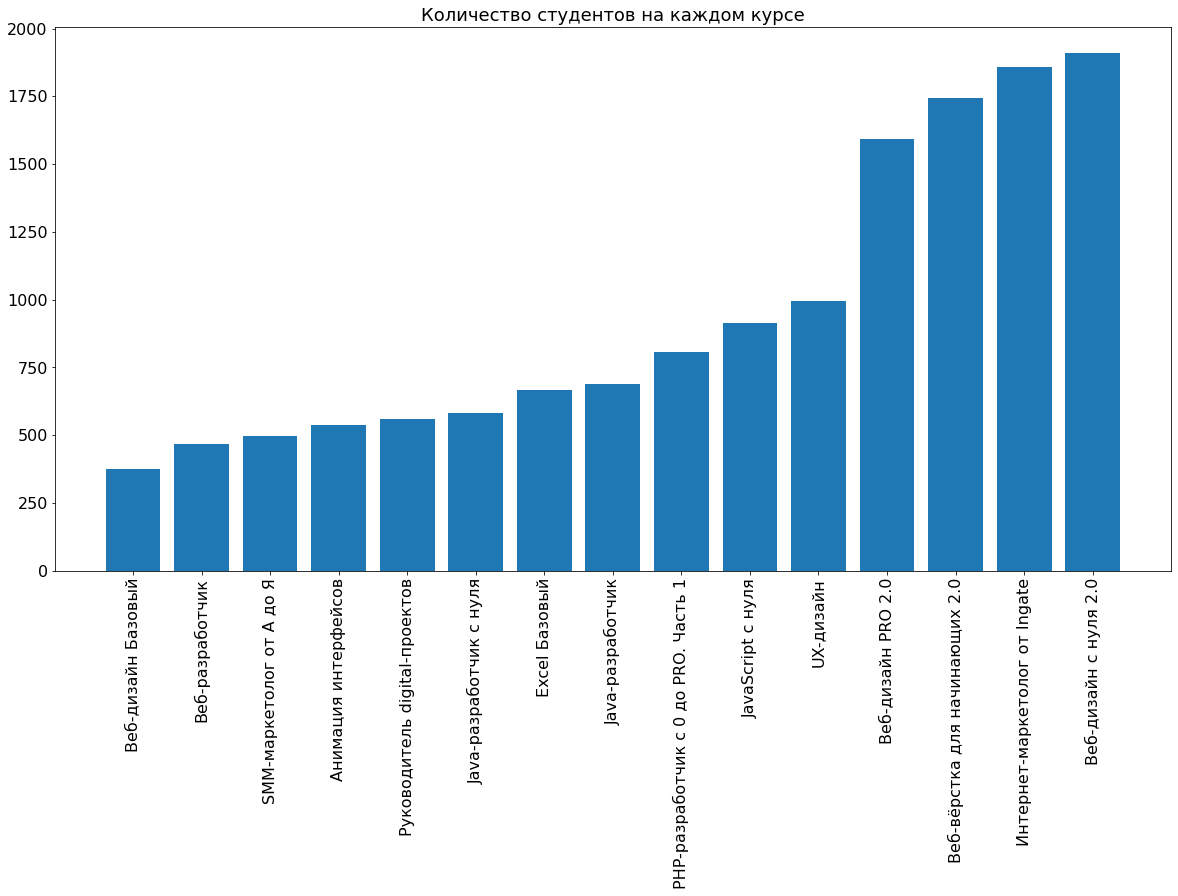

In [ ]:
# нарисуем диаграмму
plt.figure(figsize=(20,10)) # размеры "полотна"
plt.bar(height=df_students_count.student_id, x=df_students_count.title) # присвоим значения осям bar-chart
plt.title("Количество студентов на каждом курсе", fontsize=18) # заголовок
plt.xticks(labels = None, rotation='vertical') # расположение labels по оси x
plt.tick_params(labelsize=16) # размер Ticks
plt.show();

1.3. Построим горизонтальный bar-chart, отражающий количество студентов на каждом курсе.

In [ ]:
# создадим списки с перечнем цветов и названий курсов
colors = ['black', 'yellow', 'green', 'red', 'chocolate', 'saddlebrown', 'orange', 'wheat', 'olive', 'gray', 'yellowgreen', 'indigo', 'lime', 'blue', 'violet']
label=list(df_students_count['field'])
# привяжем к каждому курсу свой цвет, для легенды
patches = [mpatches.Patch(color=colors[label.index(lab)], label=list(set(df_students_count['field']))[i]) for i, lab in enumerate(set(df_students_count['field']))]
# создадим список цветов для колонки color_field
col=[colors[label.index(lab)] for lab in label]

In [ ]:
# создадим колонку с цветовым обозначением сферы курса
df_students_count['color_field'] = col

In [ ]:
# посмотрим на результат
df_students_count

,title,field,student_id,color_field
0,Веб-дизайн Базовый,Design,376,black
1,Веб-разработчик,Development,469,yellow
2,SMM-маркетолог от А до Я,Marketing,497,green
3,Анимация интерфейсов,Design,537,black
4,Руководитель digital-проектов,Business,559,chocolate
5,Java-разработчик c нуля,Development,580,yellow
6,Excel Базовый,Business,666,chocolate
7,Java-разработчик,Development,687,yellow
8,PHP-разработчик с 0 до PRO. Часть 1,Development,805,yellow
9,JavaScript с нуля,Development,914,yellow


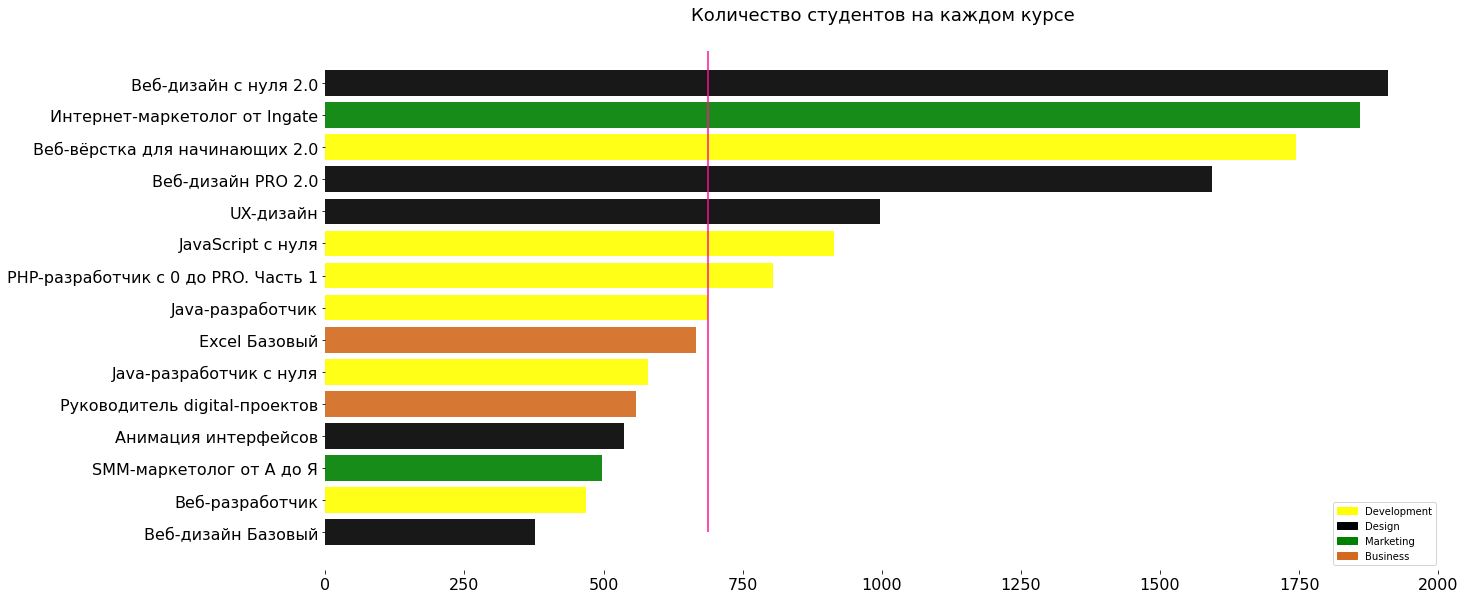

In [ ]:
# на основании созданного датафрейма построим горизонтальную диаграмму с цветами столбцов, визуализирующими информацию о сфере (поле "field")
plt.figure(figsize=(20,10)) # установим размер полотна
plt.barh(y=df_students_count.title, width=df_students_count.student_id, alpha=0.9, color=df_students_count.color_field) # присвоим значения осям диаграммы. Цвет и label для легенды берём из сформированных выше списков
plt.box(False) # удалим рамку
plt.vlines(int(df_students_count.median()), 0, len(df_students_count.index), color = 'deeppink') # добавим медиану
plt.title("Количество студентов на каждом курсе", fontsize=18)
plt.tick_params(labelsize=16) # размер Ticks
plt.legend(handles=patches) # легенде присваиваем сформированный в patches вид
plt.show();

**1.4. Выводы по первому разделу** <br><br>
В начальном исследовании имеющихся данных мы определили, что всего имеется 15 различных курса с количеством модулей от 8 до 21.
Самым популярным курсом оказался курс «Веб-дизайн с нуля 2.0», а самым непопулярным – "Веб-дизайн Базовый". Первая домашняя работа во всех курсах, кроме "Веб-дизайн базовый", встречается в первом же модуле, но вряд ли именно это является причиной непопулярности курса. Скорее всего "Веб-дизайн с нуля 2.0" является более новым, поэтому его предпочитают вместо "Веб-дизайн Базовый". В любом случае, стоит подумать о необходимости курса "Веб-дизайн Базовый".
О возрасте, преобладающем на каждом курсе, будем судить по DataSeries с медианными значениями возраста по курсам.  Разброс в этих числах не большой, от 28 до 34 лет. Самым возрастным оказался курс "Excel Базовый". Можно предположить, что чем моложе студент, тем обыденнее для него является MS Excel, и в дополнительном изучении этого продукта отпадает необходимость. Чего не скажешь про людей преклонного возраста.
Самыми "молодыми" курсами являются курсы с приставкой "Веб-".

## 2. Расчет потенциальной нагрузки на преподавателей

2.1. Рассчитаем прирост студентов на каждом курсе.

In [ ]:
# переведём столбец "start_date" датафрейма df в формат "год - месяц"
df['year_month'] = df['start_date'].dt.to_period('M')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [ ]:
# посмотрим на получившийся датафрейм
df.head()

,course_id,title,field,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,student_id,progress_id,status,start_date,finish_date,year_month
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,0b4656b84ca60350583f8fbe236dda86,45cdf025b87db75e84f93c4ac3ccb5c7,done,2019-03-29 17:02:32.838469+00:00,2019-04-13 17:32:19.134874+00:00,2019-03
1,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,1d874e6b6bdc34559781f65f9f761791,0c56109dde49080e7441e95b22bb73c2,done,2019-06-13 19:22:19.331201+00:00,2019-06-13 19:51:21.987534+00:00,2019-06
2,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,ab7f5c720e3a5e1de00c2cdbef19fbf0,36079c0615d85f3cebfa47542b43ab41,done,2019-03-27 06:56:51.138795+00:00,2019-03-27 06:56:54.834751+00:00,2019-03
3,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,29ab3f8c52a858bea2d3b9a51c433578,37384cbeb141835cc61b5fd22abd9200,done,2019-05-28 11:09:29.320478+00:00,2019-05-29 06:47:21.794092+00:00,2019-05
4,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,72afe01498ba14045467fc32029b650c,3a79d622c4057c1c029c74e282e43396,done,2019-03-24 07:03:03.582679+00:00,2019-03-24 09:50:32.595199+00:00,2019-03


In [ ]:
# исследуем, в каком модуле на каждом курсе появляется домашнее задание
df_min_hw = df[df['is_homework'] == True].groupby(['title'], as_index=False)['module_number'].min()
df_min_hw

,title,module_number
0,Excel Базовый,1
1,Java-разработчик,1
2,Java-разработчик c нуля,1
3,JavaScript с нуля,1
4,PHP-разработчик с 0 до PRO. Часть 1,1
5,SMM-маркетолог от А до Я,1
6,UX-дизайн,1
7,Анимация интерфейсов,1
8,Веб-вёрстка для начинающих 2.0,1
9,Веб-дизайн PRO 2.0,1


In [ ]:
# найдём количество студентов в каждом модуле и каждом месяце
df_min_hw_2 = df[df['is_homework'] == True].groupby(['title', 'module_number', 'year_month'], as_index=False)['student_id'].nunique()
df_min_hw_2

,title,module_number,year_month,student_id
0,Excel Базовый,1,2018-02,6
1,Excel Базовый,1,2018-03,3
2,Excel Базовый,1,2018-05,3
3,Excel Базовый,1,2018-06,9
4,Excel Базовый,1,2018-07,13
...,...,...,...,...
2763,Руководитель digital-проектов,16,2019-03,3
2764,Руководитель digital-проектов,16,2019-04,7
2765,Руководитель digital-проектов,16,2019-05,7
2766,Руководитель digital-проектов,16,2019-06,4


In [ ]:
# объединим два датафрейма так, чтобы остались данные только по минимальному модулю каждого курса
df_min_hw_result = df_min_hw.merge(df_min_hw_2, on=['title', 'module_number'])
df_min_hw_result

,title,module_number,year_month,student_id
0,Excel Базовый,1,2018-02,6
1,Excel Базовый,1,2018-03,3
2,Excel Базовый,1,2018-05,3
3,Excel Базовый,1,2018-06,9
4,Excel Базовый,1,2018-07,13
...,...,...,...,...
239,Руководитель digital-проектов,1,2019-03,36
240,Руководитель digital-проектов,1,2019-04,17
241,Руководитель digital-проектов,1,2019-05,25
242,Руководитель digital-проектов,1,2019-06,15


In [ ]:
# создадим сводную таблицу на основании df_min_hw_result
p_table = pd.pivot_table(df_min_hw_result, values='student_id', index=['year_month'], columns=['title'], aggfunc=np.sum, fill_value=0)
p_table

title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
year_month,,,,,,,,,,,,,,,
2016-03,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2016-11,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
2017-03,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
2017-04,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2017-05,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2017-06,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2017-07,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2018-01,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
2018-02,6,14,0,0,0,0,61,14,0,0,56,0,31,76,64


2.2. На основании первого пункта построим line-graph с приростом студентов в каждом месяце для каждого курса.

In [ ]:
# зарегистрируем конвертер pandas для работы с datetime в matplotlib
pd.plotting.register_matplotlib_converters()

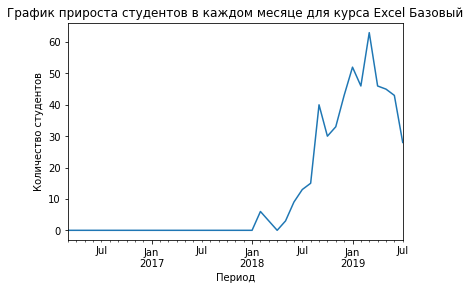

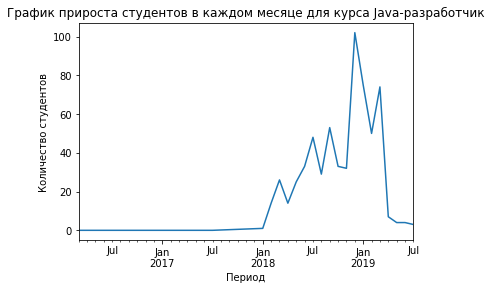

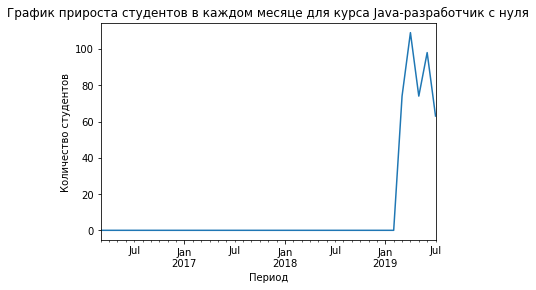

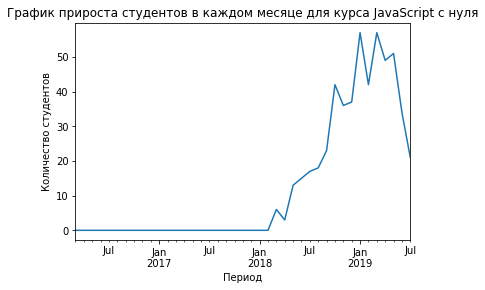

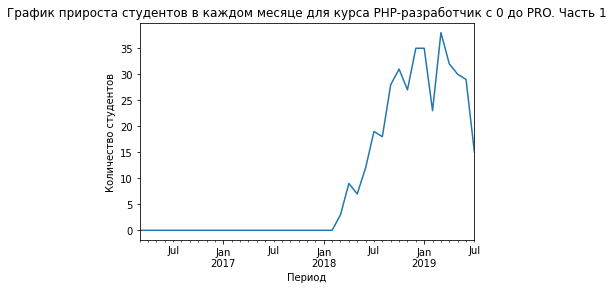

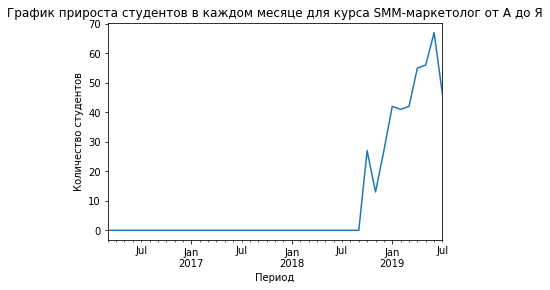

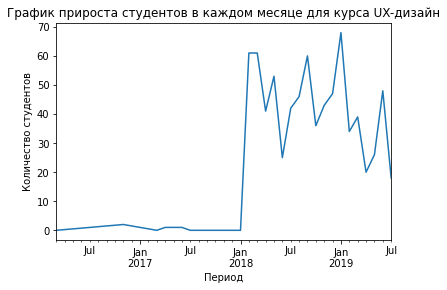

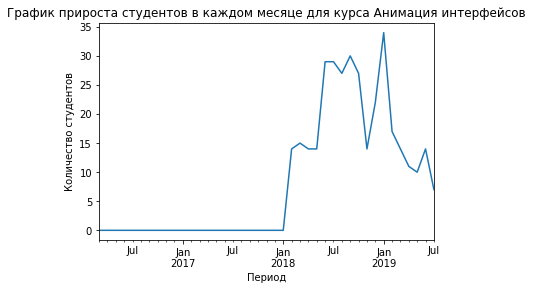

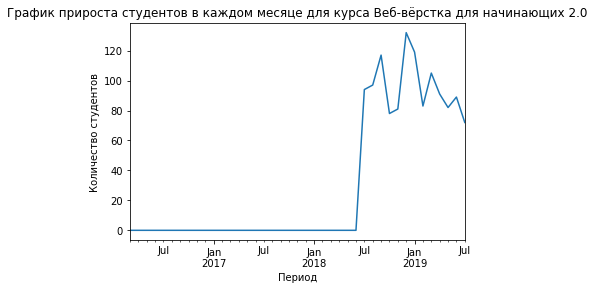

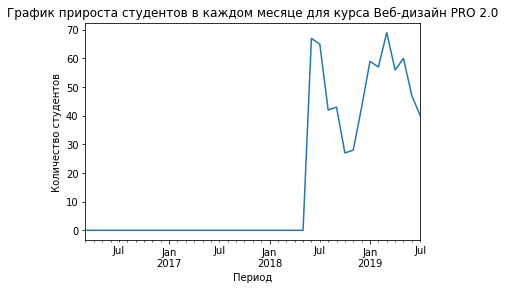

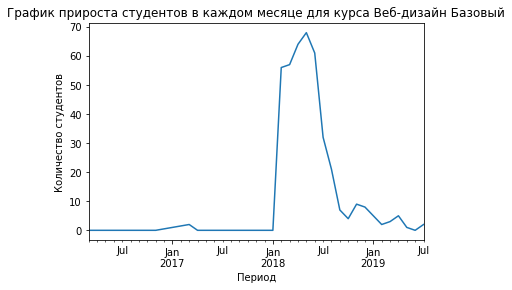

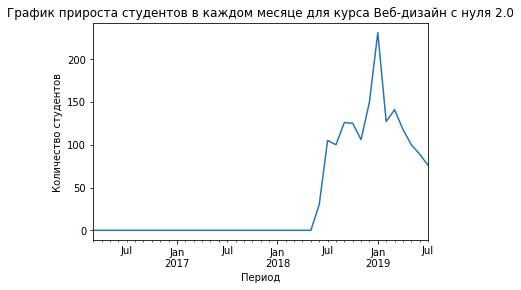

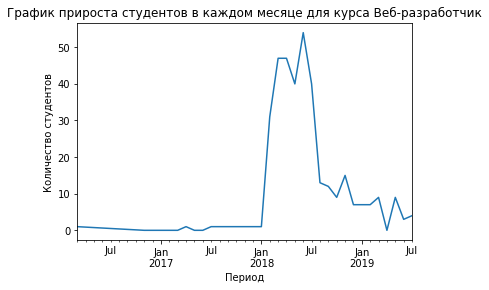

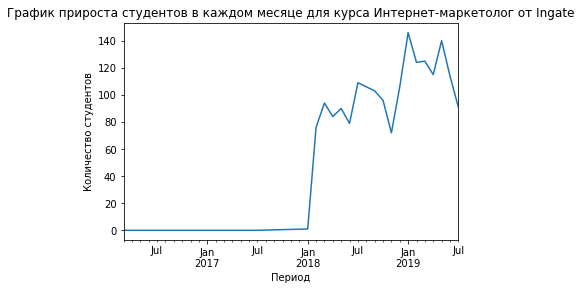

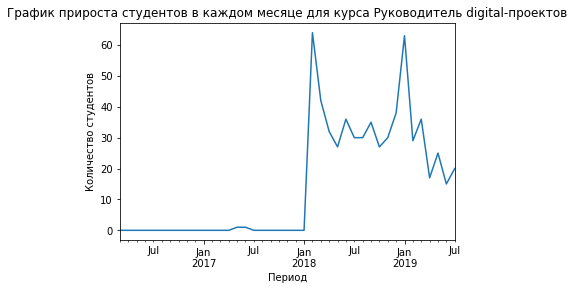

In [ ]:
# циклом пройдём по всем курсам и построим графики
for course in p_table.columns:
  p_table[course].plot()
  plt.title('График прироста студентов в каждом месяце для курса ' + course)
  plt.xlabel('Период')
  plt.ylabel('Количество студентов')
  plt.show()


2.3. Построим более информативный график в соответствии с требованиями задания.

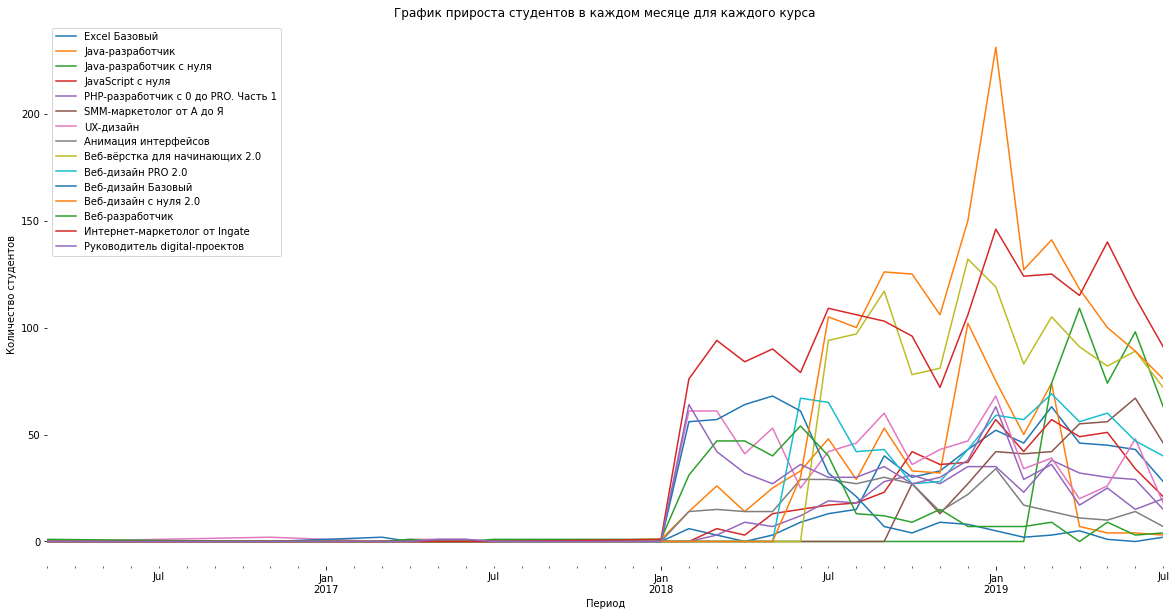

In [ ]:
# внутри "полотна" figure построим с помощью цикла for графики прироста всех курсов
fig, ax = plt.subplots(figsize=(20,10))
for course in p_table.columns:
  p_table[course].plot(ax=ax, label=course)

# уберём рамку, добавим заголовок, названия осей и легенду
plt.box(False)
plt.title('График прироста студентов в каждом месяце для каждого курса')
plt.xlabel('Период')
plt.ylabel('Количество студентов')
plt.legend()

plt.show()

2.4. Рассчитаем количество прогрессов по выполнению домашних работ в каждом месяце за всю историю.

In [ ]:
# создадим новый датафрейм на основании df, удалим строки с пустыми значениями даты начала или конца
df_periods = df[['title', 'progress_id', 'is_homework', 'start_date', 'finish_date', 'status']].dropna(subset=['start_date'])

In [ ]:
# удалим данные, не относящиеся к домашним работам
df_periods=df_periods[df_periods['is_homework']==True]

In [ ]:
# оставим работы со статусом done
df_periods=df_periods[(df_periods['status']=='done')]

In [ ]:
# df_periods['finish_date'].fillna(np.datetime64('now'), inplace=True)

In [ ]:
# создадим новую колонку, в которой будет первое число месяца из колонки start_date. Это нужно, для того, чтобы функция date_range (см. след. IN:) с параметром freq='MS' не "съедала" первый месяц
df_periods['start_month']=df_periods['start_date'].dt.to_period('M').dt.to_timestamp().astype('datetime64[ns, UTC]')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [ ]:
df_periods

,title,progress_id,is_homework,start_date,finish_date,status,start_month
2842,Java-разработчик c нуля,0c56109dde49080e7441e95b22bb73c2,True,2019-06-16 19:35:55.125766+00:00,2019-06-23 08:10:42.867492+00:00,done,2019-06-01 00:00:00+00:00
2844,Java-разработчик c нуля,37384cbeb141835cc61b5fd22abd9200,True,2019-05-29 18:03:54.230822+00:00,2019-06-05 08:06:37.896891+00:00,done,2019-05-01 00:00:00+00:00
2846,Java-разработчик c нуля,d0cecd82f603e457eb1142def0fa3104,True,2019-03-26 10:29:14.626280+00:00,2019-03-28 03:00:12.350836+00:00,done,2019-03-01 00:00:00+00:00
2847,Java-разработчик c нуля,7cf32981e0bc2b36b62cc4f32f189036,True,2019-04-22 16:29:30.480639+00:00,2019-04-24 18:02:09.869749+00:00,done,2019-04-01 00:00:00+00:00
2848,Java-разработчик c нуля,b9e20d5d0c843ff9340e3c195b34aea4,True,2019-05-08 11:11:45.746914+00:00,2019-05-08 14:22:30.788356+00:00,done,2019-05-01 00:00:00+00:00
...,...,...,...,...,...,...,...
350668,Java-разработчик,a8e150380119cccef7ffd03a9ffc8d3a,True,2019-02-19 14:18:09.152858+00:00,2019-05-24 23:25:21.466337+00:00,done,2019-02-01 00:00:00+00:00
350669,Java-разработчик,1853ec03b5896c362dd09499a1aa47bb,True,2018-11-16 11:42:37.222284+00:00,2018-12-06 13:57:51.424411+00:00,done,2018-11-01 00:00:00+00:00
350670,Java-разработчик,0b7c3544078a50513763b44e44a2a41f,True,2018-09-10 09:26:38.708619+00:00,2018-09-21 16:44:06.984602+00:00,done,2018-09-01 00:00:00+00:00
350674,Java-разработчик,66ff04d276a67a3db09ba1c5fa14b581,True,2019-03-23 11:59:16.101317+00:00,2019-03-23 11:59:20.423056+00:00,done,2019-03-01 00:00:00+00:00


In [ ]:
# построим список со всеми месяцами, в течение которых делалась работа
df_periods['period'] = df_periods.apply(lambda x: pd.period_range(start=x[6], end=x[4], freq='M'), axis=1)

In [ ]:
# каждый элемент списка в колонке period поместим в новую строку с сохранением значений из других колонок этой строки
df_periods = df_periods.explode('period')

In [ ]:
# df_periods[df_periods['title']=='Excel Базовый'].sort_values('start_date').head(50)

In [ ]:
# df[(df['title']=='Excel Базовый')&(df['is_homework']==True)].sort_values('start_date').head(50)

In [ ]:
# благодаря предыдущим преобразованиям, можем посчитать общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз
df_periods = df_periods.groupby(['title', 'period'], as_index=False).agg({'progress_id':'count'})

In [ ]:
# создадим сводную таблицу для df_periods, в которой увидим распределение количества прогрессов по месяцам и по курсам
p_table = pd.pivot_table(df_periods, values='progress_id', index=['period'], columns=['title'], aggfunc=np.sum, fill_value=0)
p_table

title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
period,,,,,,,,,,,,,,,
2016-03,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0
2016-11,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
2016-12,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
2017-01,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2017-02,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
2017-03,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0
2017-04,0,0,0,0,0,0,2,0,0,0,4,0,1,0,0
2017-05,0,0,0,0,0,0,3,0,0,0,2,0,2,0,1
2017-06,0,0,0,0,0,0,6,0,0,0,1,0,2,0,2


2.5. Построим line-graph по четвёртому пункту.

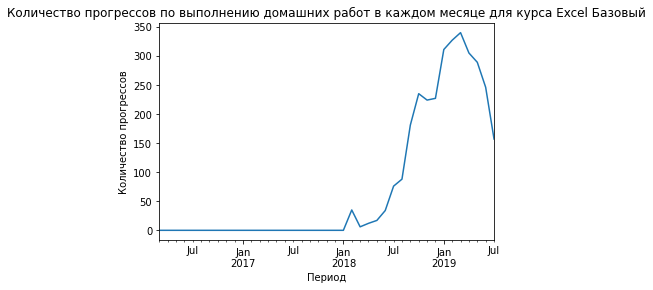

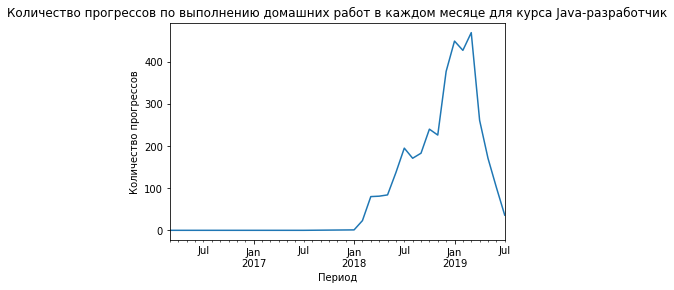

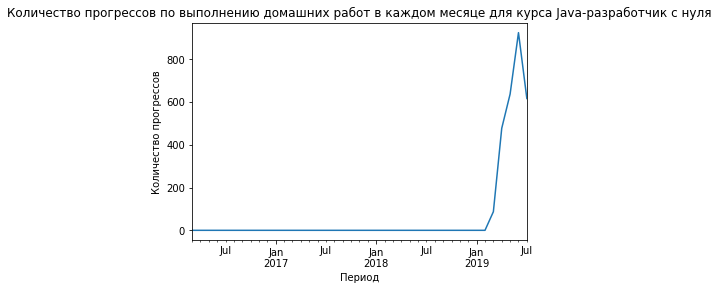

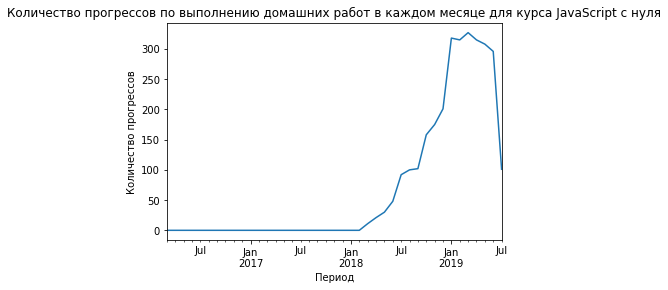

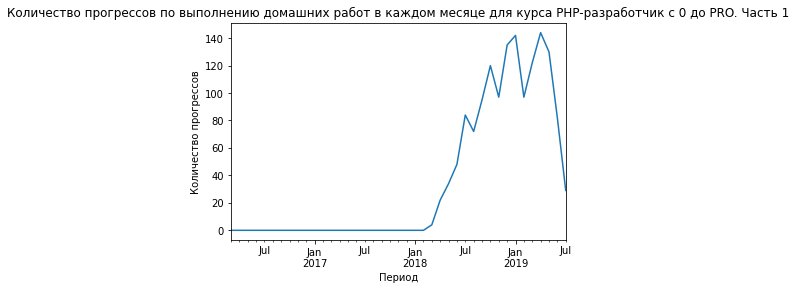

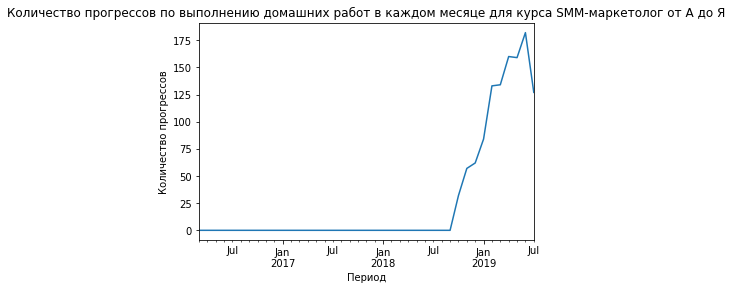

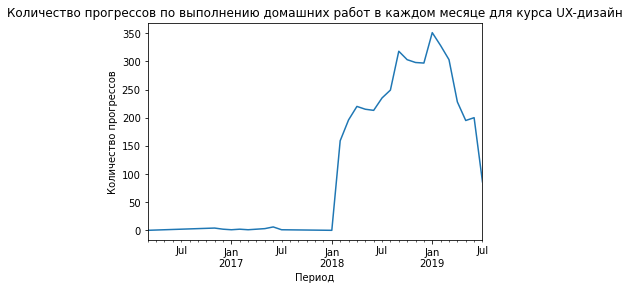

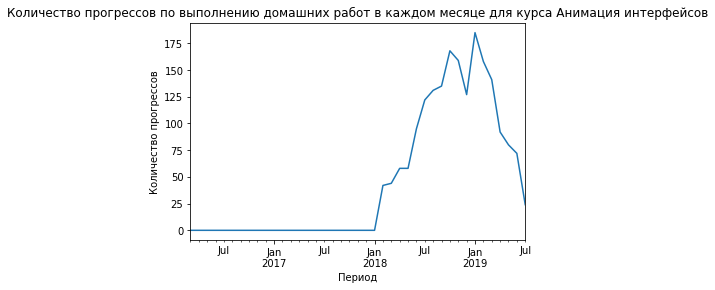

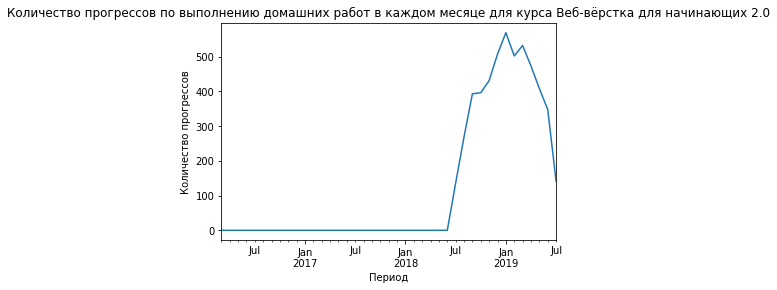

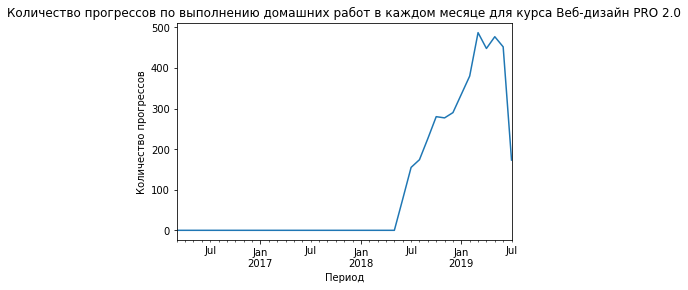

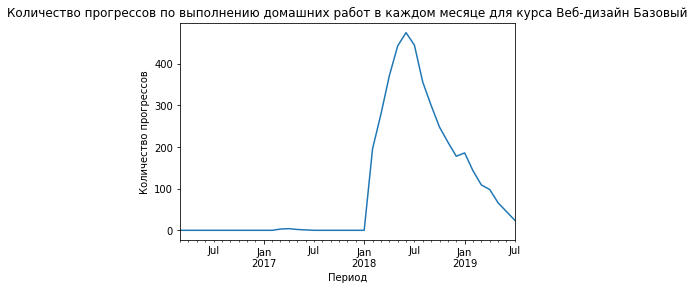

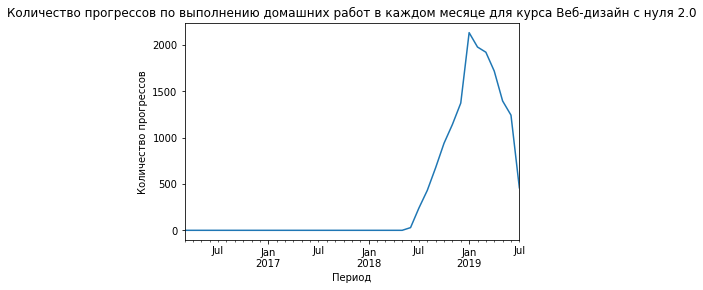

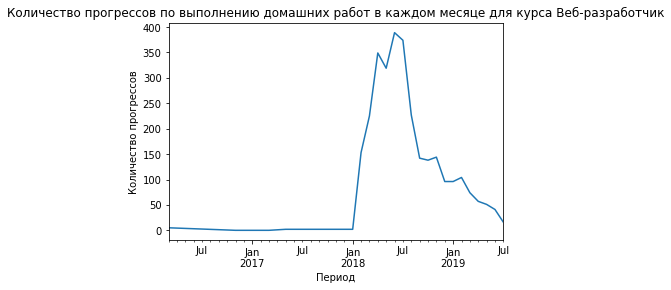

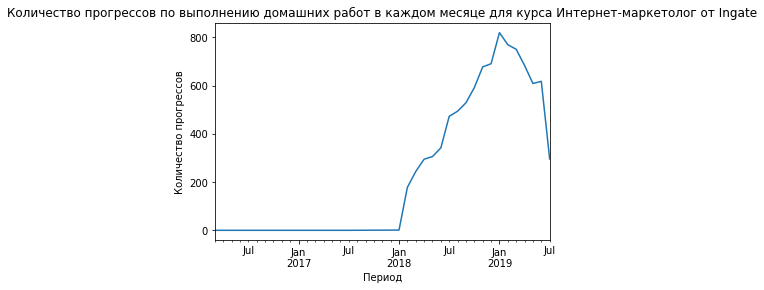

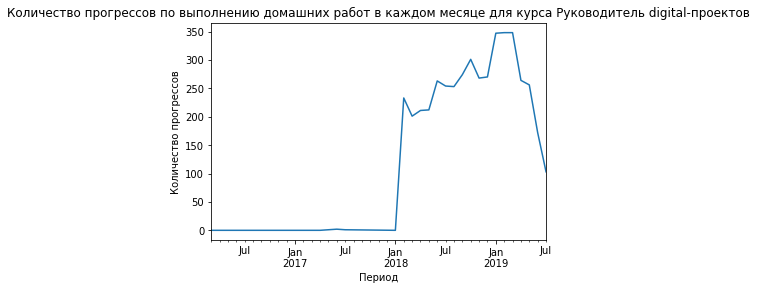

In [ ]:
# циклом пройдём по всем курсам и построим графики
for course in p_table.columns:
  p_table[course].plot()
  plt.title('Количество прогрессов по выполнению домашних работ в каждом месяце для курса ' + course)
  plt.xlabel('Период')
  plt.ylabel('Количество прогрессов')
  plt.show()

2.6. Построим один line-graph для всех курсов по четвертому пункту.

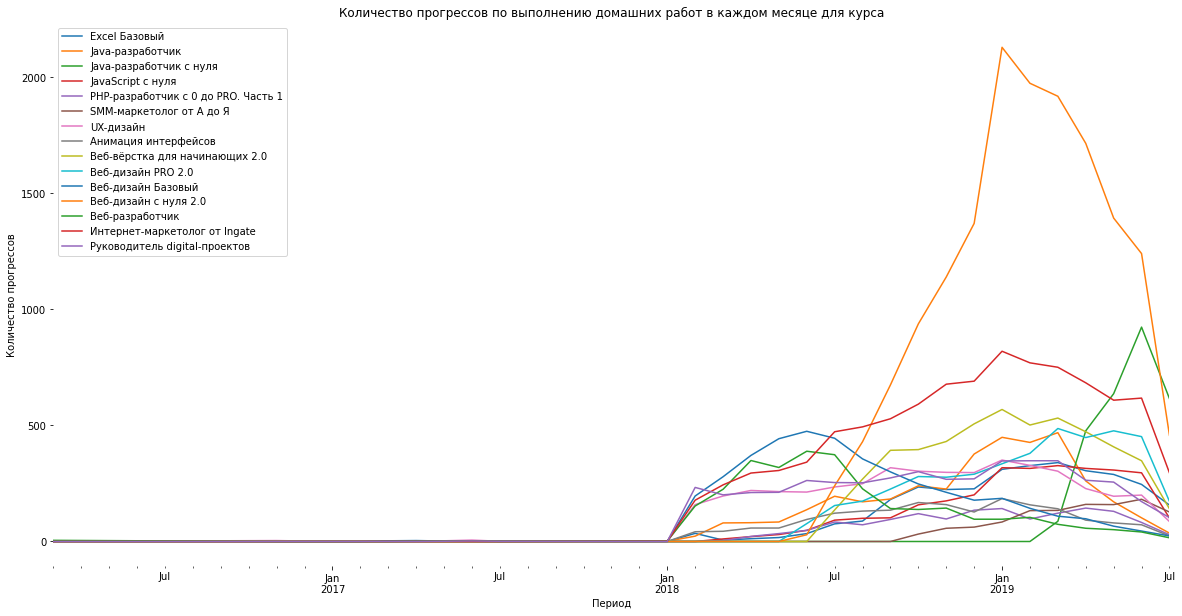

In [ ]:
# внутри "полотна" figure построим с помощью цикла for графики прогрессов всех курсов
fig, ax = plt.subplots(figsize=(20,10))
for course in p_table.columns:
  p_table[course].plot(ax=ax, label=course)

# уберём рамку, добавим заголовок, названия осей и легенду
plt.box(False)
plt.title('Количество прогрессов по выполнению домашних работ в каждом месяце для курса')
plt.xlabel('Период')
plt.ylabel('Количество прогрессов')
plt.legend()

plt.show()

**2.7. Выводы по второму разделу** <br><br>
С февраля 2018 года начался резкий прирост студентов на большинстве рассматриваемых курсах. Вероятнее всего, это результат удачной рекламной кампании.
Самым поздним по началу прироста студентов оказался курс "Java-разработчик с нуля". Это произошло в марте 2019. Причём на это время приходится резкий подъём спроса на все курсы по Java.
Также о том, что Java в это время вдруг стало популярным говорит то факт, что максимальное количество выполняемых домашних работ, которые делались в это время, были именно по Java. Соответственно, возросла нагрузка на преподавателей этих курсов.
По остальным курсам выполнение домашних работ по времени проходило стабильно, без особых скачков.



## 3. Выявление проблемных модулей


3.1. Рассчитаем минимальное, максимальное, среднее, медианное время прохождения каждого модуля для каждого курса.

In [ ]:
# создадим новый датафрейм на основе df
df_new = df.copy(deep=True)

In [ ]:
# сгруппируем датафрейм по названию курса, модуля и id студента с учётом требования при нескольких дз в модуле
df_new=df_new[(df_new['is_homework'] == True) & (df_new['status'] == 'done')].groupby(['title', 'module_number', 'student_id'], as_index=False).agg({'start_date':'min','finish_date':'max'})

In [ ]:
# создадим колонку с продолжительностью выполнения дз каждого модуля в формате float  в днях
df_new['duration'] = (df_new['finish_date'] - df_new['start_date']).apply(lambda x: x/np.timedelta64(1, 'D'))

In [ ]:
# рассчитаем максимальное время прохождения каждого модуля, отбросив отрицательные значения продолжительности выполнения дз
df_new[df_new['duration'] > 0].groupby(['title', 'module_number'], as_index=False).agg({'duration':'max'})

,title,module_number,duration
0,Excel Базовый,1,183.748521
1,Excel Базовый,2,184.269315
2,Excel Базовый,3,89.133226
3,Excel Базовый,4,327.548593
4,Excel Базовый,5,175.549187
...,...,...,...
185,Руководитель digital-проектов,12,211.568173
186,Руководитель digital-проектов,13,246.843796
187,Руководитель digital-проектов,14,199.136059
188,Руководитель digital-проектов,15,132.207370


In [ ]:
# рассчитаем минимальное время прохождения каждого модуля, отбросив отрицательные значения продолжительности выполнения дз
df_new[df_new['duration'] > 0].groupby(['title', 'module_number'], as_index=False).agg({'duration':'min'})

,title,module_number,duration
0,Excel Базовый,1,3.667941e-02
1,Excel Базовый,2,3.734630e-02
2,Excel Базовый,3,1.969859e-02
3,Excel Базовый,4,7.341443e-02
4,Excel Базовый,5,5.742466e-02
...,...,...,...
185,Руководитель digital-проектов,12,2.048611e-08
186,Руководитель digital-проектов,13,1.778935e-08
187,Руководитель digital-проектов,14,2.346065e-08
188,Руководитель digital-проектов,15,3.591435e-08


In [ ]:
# рассчитаем среднее время прохождения каждого модуля, отбросив отрицательные значения продолжительности выполнения дз
df_new[df_new['duration'] > 0].groupby(['title', 'module_number'], as_index=False)['duration'].mean()

,title,module_number,duration
0,Excel Базовый,1,6.044389
1,Excel Базовый,2,4.348888
2,Excel Базовый,3,3.449001
3,Excel Базовый,4,11.036427
4,Excel Базовый,5,7.454665
...,...,...,...
185,Руководитель digital-проектов,12,23.096087
186,Руководитель digital-проектов,13,28.996515
187,Руководитель digital-проектов,14,16.436813
188,Руководитель digital-проектов,15,7.439187


In [ ]:
# рассчитаем медианное время прохождения каждого модуля, отбросив отрицательные значения продолжительности выполнения дз
df_median=df_new[df_new['duration'] > 0].groupby(['title', 'module_number'], as_index=False)['duration'].median()
df_median

,title,module_number,duration
0,Excel Базовый,1,2.331200
1,Excel Базовый,2,1.873221
2,Excel Базовый,3,1.510202
3,Excel Базовый,4,3.254614
4,Excel Базовый,5,3.085911
...,...,...,...
185,Руководитель digital-проектов,12,7.927692
186,Руководитель digital-проектов,13,13.797236
187,Руководитель digital-проектов,14,8.885838
188,Руководитель digital-проектов,15,2.835679


In [ ]:
# создадим сводную таблицу для df_periods, в которой увидим распределение продолжительности выполнения дз по модулям и по курсам
p_table = pd.pivot_table(df_median, values='duration', index=['module_number'], columns=['title'], aggfunc=np.sum, fill_value=0)
p_table

title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
module_number,,,,,,,,,,,,,,,
1,2.331200,3.748506,3.731676,3.836670,1.688516,7.609393,4.881653,1.938850,3.002774,5.085395,0.000000,6.932599,1.158171,2.412160,2.660219
2,1.873221,7.532437,3.893804,9.390133,14.299171,12.478317,5.422178,4.779599,7.128899,22.536828,0.000000,0.000000,2.388329,12.108099,9.224785
3,1.510202,9.470734,6.582703,5.885680,14.885356,11.385577,6.870494,7.760896,18.752692,0.000000,6.735788,6.036347,3.172335,13.112361,7.912284
4,3.254614,7.756707,9.753856,8.568200,21.667879,6.732459,13.243816,8.070409,18.873896,16.220185,0.000000,7.452883,2.391047,4.126244,23.094521
5,3.085911,8.341318,11.714206,10.148515,21.059281,5.729961,0.000000,6.406114,24.098801,6.317769,5.241597,4.340130,2.797347,6.115143,6.438173
6,2.432036,6.260811,9.450879,8.621973,17.886555,11.852229,11.093767,0.000000,18.223522,6.930173,13.134139,0.000000,8.847135,15.386474,4.850021
7,4.921749,6.227826,5.502408,11.288126,37.754079,0.000000,14.053112,12.877815,14.358385,9.593708,8.770947,3.782820,5.952509,3.174116,9.641880
8,2.993231,13.468218,12.261355,5.918275,89.469450,10.941209,0.000000,19.810018,22.111770,0.000000,10.696062,0.000000,6.290543,10.623214,12.252624
9,10.197769,24.429399,8.680946,5.367819,0.000000,0.000000,53.890465,0.000000,0.000000,6.163184,8.565068,8.045034,4.353944,8.949701,4.264781


3.2. На основании первого пункта построим line-graph с медианным временем прохождения каждого модуля для каждого курса.

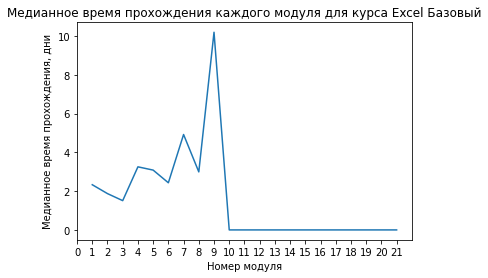

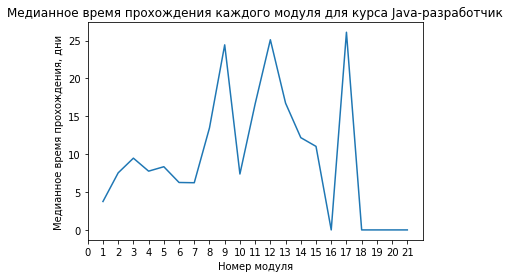

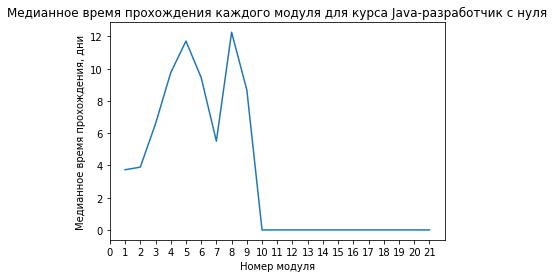

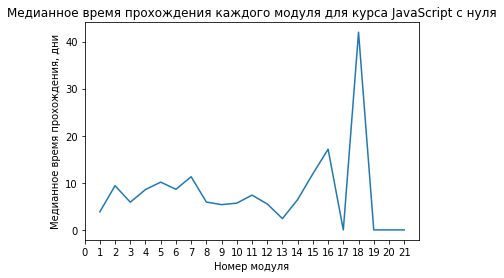

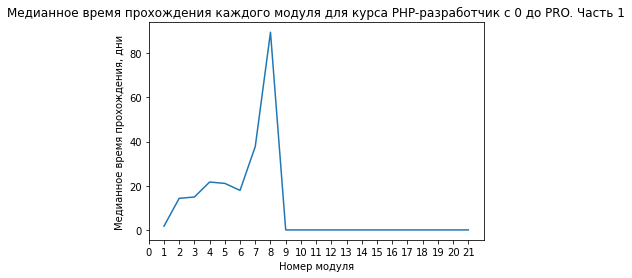

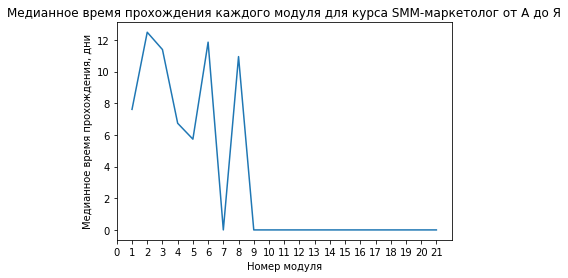

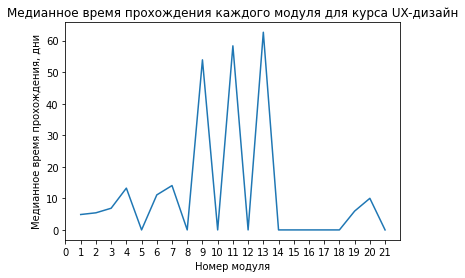

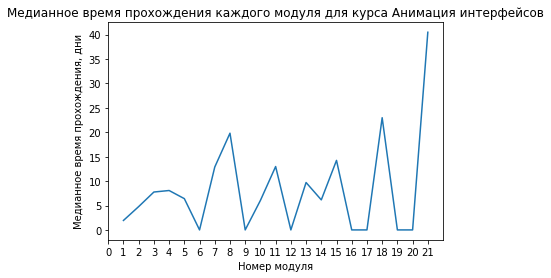

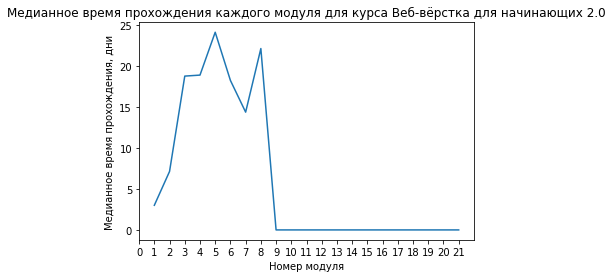

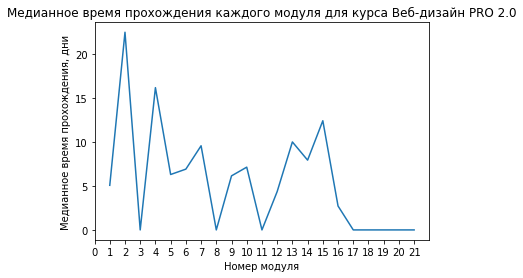

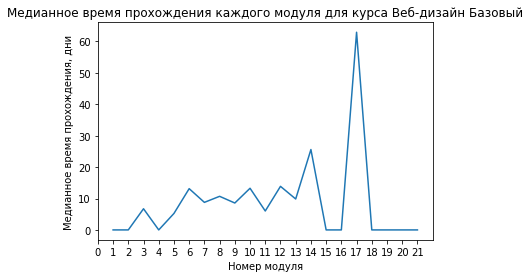

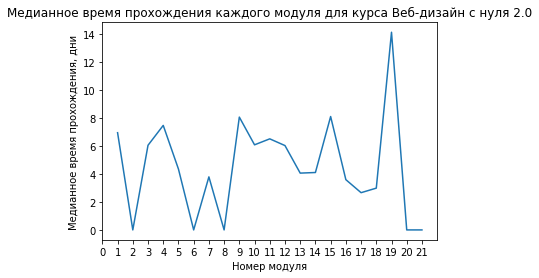

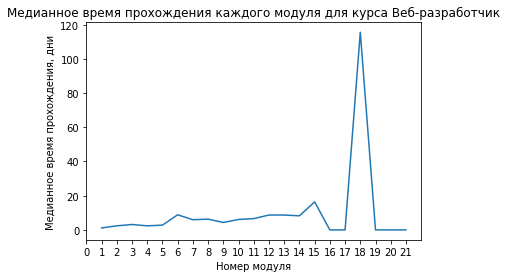

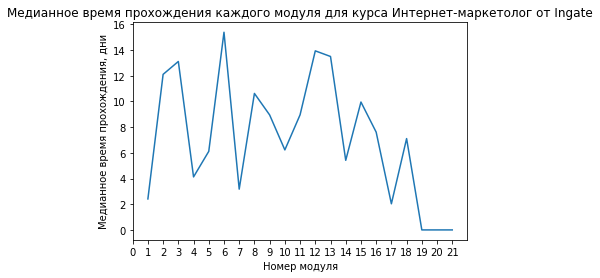

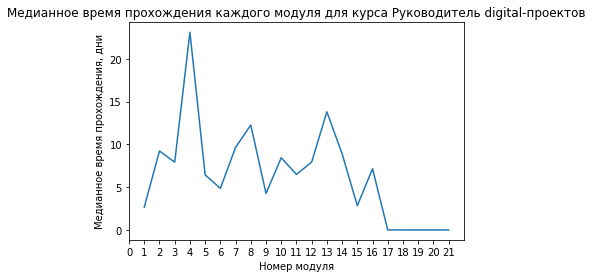

In [ ]:
# циклом пройдём по всем курсам и построим графики
for course in p_table.columns:
  p_table[course].plot()
  plt.title('Медианное время прохождения каждого модуля для курса ' + course)
  plt.xticks(np.arange(0, 22, 1)) # по оси х будут располагаться номера всех модулей
  plt.xlabel('Номер модуля')
  plt.ylabel('Медианное время прохождения, дни')
  plt.show()

3.3. Чтобы выявить сезонность, посчитаем медианное время выполнения домашней работы по месяцам для каждого курса.

In [ ]:
# создадим новый датафрейм на основе df
df_new = df.copy(deep=True)

In [ ]:
# сгруппируем датафрейм по названию курса, месяца и id студента с учётом требования при нескольких дз в модуле
df_new=df_new[(df_new['is_homework'] == True) & (df_new['status'] == 'done')].groupby(['title', 'year_month', 'student_id'], as_index=False).agg({'start_date':'min','finish_date':'max'})

In [ ]:
# создадим колонку с продолжительностью выполнения дз каждого модуля в формате float  в днях
df_new['duration'] = (df_new['finish_date'] - df_new['start_date']).apply(lambda x: x/np.timedelta64(1, 'D'))

In [ ]:
# рассчитаем медианное время прохождения каждого модуля, отбросив отрицательные значения продолжительности выполнения дз
df_median_month=df_new[df_new['duration'] > 0].groupby(['title', 'year_month'], as_index=False)['duration'].median()
df_median_month

,title,year_month,duration
0,Excel Базовый,2018-02,0.859903
1,Excel Базовый,2018-03,1.713177
2,Excel Базовый,2018-04,22.493497
3,Excel Базовый,2018-05,15.257928
4,Excel Базовый,2018-06,1.606757
...,...,...,...
246,Руководитель digital-проектов,2019-03,19.450206
247,Руководитель digital-проектов,2019-04,27.750525
248,Руководитель digital-проектов,2019-05,16.664797
249,Руководитель digital-проектов,2019-06,10.493540


In [ ]:
# создадим сводную таблицу для df_median_month, в которой увидим распределение продолжительности выполнения дз по месяцам и по курсам
p_table = pd.pivot_table(df_median_month, values='duration', index=['year_month'], columns=['title'], aggfunc=np.sum, fill_value=0)
p_table

title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
year_month,,,,,,,,,,,,,,,
2016-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.769525,0.000000,0.000000
2016-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.545365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.829757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.574277,0.000000,0.000000,0.000000,0.000000
2017-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.818981,0.000000,0.000000,0.000000,46.873356,0.000000,35.639549,0.000000,0.000000
2017-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.901505,0.000000,0.000000,0.000000,0.000000,0.000000,24.617141,0.000000,1.318993
2017-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.799878,0.000000,0.000000,0.000000,0.000000,0.000000,2.911644,0.000000,8.780266
2017-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.045475,0.000000,0.000000
2018-01,0.000000,2.145463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.778194,2.676343,0.000000


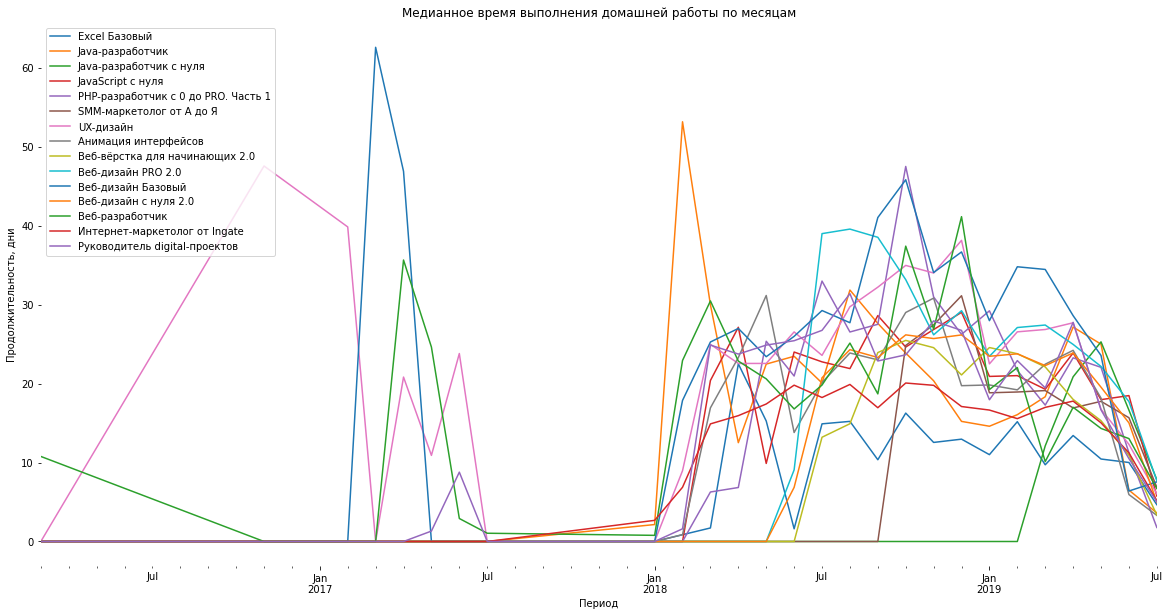

In [ ]:
# внутри "полотна" figure построим с помощью цикла for графики всех курсов c медианным временем выполнения домашней работы по месяцам
fig, ax = plt.subplots(figsize=(20,10))
for course in p_table.columns:
  p_table[course].plot(ax=ax, label=course)

# уберём рамку, добавим заголовок, названия осей и легенду
plt.box(False)
plt.title('Медианное время выполнения домашней работы по месяцам')
plt.xlabel('Период')
plt.ylabel('Продолжительность, дни')
plt.legend(loc='upper left')

plt.show()

**3.5. Выводы по третьему разделу <br><br>**
Самым продолжительным по выполнению является 18 модуль "Экзаменационная работа" курса "Веб-разработчик", который выполнялся в среднем почти 116 дней. Возможными причинами являются плохая подача материала в лекциях, либо сложное и объёмное домашние задания. Также необходимо обратить внимание на модуль 8 "Курсовая работа" курса "PHP-разработчик с 0 до PRO. Часть 1", задание к которому выполнялось в среднем 90 дней.

## 4. Расчет конверсии


4.1. Посчитаем конверсию перехода студентов из одного модуля в другой на каждом курсе.

In [ ]:
# создадим новый датафрейм на основе df
df_new = df.copy(deep=True)

In [ ]:
# создадим два дополнительных датафрейма с количеством студентов начавших и завершивших дз каждого модуля
df_start = df_new[df_new['is_homework'] == True].groupby(['title', 'module_number', 'module_title'], as_index=False)['start_date'].count()
df_shift = df_new[df_new['is_homework'] == True].groupby(['title', 'module_number', 'module_title'], as_index=False)['finish_date'].count()

In [ ]:
# сместим значения количества студентов, завершивших дз модуля, на одну строку вниз
df_shift['shift'] = df_shift.groupby('title')['finish_date'].shift()

In [ ]:
# удалим ненужный столбец finish_date
df_shift.drop(columns='finish_date', inplace=True)

In [ ]:
# объединим два предыдущих датафрема по двум столбцам
df_conversion = df_start.merge(df_shift, on=['title', 'module_number', 'module_title'])

In [ ]:
# по формуле из текста задания вычислим конверсию по каждому модулю. В первых модулях значение конверсии равно 100%
df_conversion['conversion'] = ((df_conversion['start_date'] / df_conversion['shift']) * 100).fillna(100)

In [ ]:
# добавим столбец с номером и названием модуля (в будущем для оси y на диаграммах)
df_conversion['number_title'] = df_conversion['module_number'].astype(str) + ' - ' + df_conversion['module_title'].astype(str)

In [ ]:
# посмотрим, что получилось
df_conversion.head(10)

,title,module_number,module_title,start_date,shift,conversion,number_title
0,Excel Базовый,1,Основной функционал Excel,518,NaN,100.000000,1 - Основной функционал Excel
1,Excel Базовый,2,Основной функционал Excel (продолжение),434,458.0,94.759825,2 - Основной функционал Excel (продолжение)
2,Excel Базовый,3,Формулы и функции Excel. Введение,398,406.0,98.029557,3 - Формулы и функции Excel. Введение
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,387.0,89.147287,4 - Формулы и функции Excel. Продолжаем работа...
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,303.0,98.349835,5 - Формулы и функции Excel. Более сложные фор...
5,Excel Базовый,6,"Формулы и функции Excel. Работа с ошибками, пр...",263,270.0,97.407407,6 - Формулы и функции Excel. Работа с ошибками...
6,Excel Базовый,7,Визуализация данных Excel,238,242.0,98.347107,7 - Визуализация данных Excel
7,Excel Базовый,8,Сводные таблицы Excel,202,200.0,101.000000,8 - Сводные таблицы Excel
8,Excel Базовый,9,Экзаменационная работа,191,186.0,102.688172,9 - Экзаменационная работа
9,Java-разработчик,1,Вводный модуль,627,NaN,100.000000,1 - Вводный модуль


In [ ]:
# создадим сводную таблицу для df_conversion, в которой увидим изменение конверсии перехода из одного модуля в другой по курсам
p_table = pd.pivot_table(df_conversion, values='conversion', index=['module_number'], columns=['title'], aggfunc=np.sum)
p_table

title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
module_number,,,,,,,,,,,,,,,
1,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000
2,94.759825,92.539964,98.586572,95.000000,85.530547,81.818182,97.382199,98.194946,92.500000,94.639556,NaN,NaN,98.376623,91.264508,95.892857
3,98.029557,87.587822,95.475113,98.443580,130.769231,94.827586,98.559671,99.082569,99.143207,NaN,100.000000,100.294118,98.884758,90.594595,107.200000
4,89.147287,96.258503,549.333333,99.082569,102.400000,56.435644,100.245098,104.861111,102.391304,191.515152,NaN,98.848684,91.735537,107.167832,97.101449
5,98.349835,93.103448,61.768531,104.494382,113.750000,121.739130,NaN,93.333333,103.358209,47.882136,95.480226,98.001817,115.609756,95.365419,104.910714
6,97.407407,101.156069,61.520737,99.315068,105.555556,505.555556,96.296296,NaN,108.125000,97.863248,99.074074,NaN,91.705069,92.904656,99.534884
7,98.347107,98.750000,41.772152,100.000000,98.181818,NaN,99.248120,94.845361,105.042017,102.051282,98.561151,98.029557,101.960784,114.788732,98.500000
8,101.000000,95.774648,95.348837,98.076923,119.444444,96.923077,NaN,98.591549,107.446809,NaN,100.000000,NaN,98.437500,97.979798,102.597403
9,102.688172,105.660377,75.757576,98.924731,NaN,NaN,125.352113,NaN,NaN,95.882353,99.137931,99.256900,105.555556,100.000000,101.492537


4.2. Постром bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе.

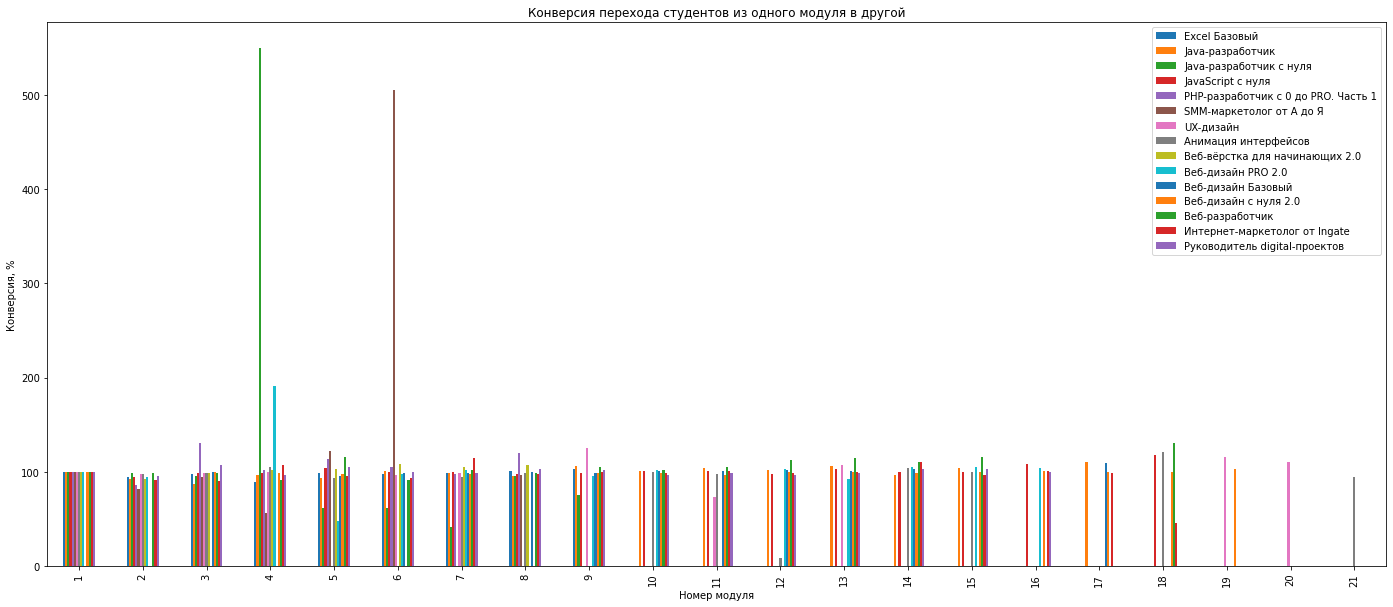

In [ ]:
# построим столбчатые диаграммы
p_table.plot.bar(figsize=(24,10))
plt.title('Конверсия перехода студентов из одного модуля в другой')
plt.xlabel('Номер модуля')
plt.ylabel('Конверсия, %')
plt.legend();

4.3. Построим горизонтальные bar-charts, отражающие конверсию перехода студентов из одного модуля в другой на каждом курсе.

In [ ]:
# создадим дополнительную сводную таблицу для df_conversion, в которой будут номер и название модулей. Nan заменим на пробел. Всё это надо для вывода названий модулей по оси y
p_table_1 = pd.pivot_table(df_conversion, values='number_title', index=['module_number'], columns=['title'], aggfunc=np.sum).fillna(' ')
p_table_1

title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
module_number,,,,,,,,,,,,,,,
1,1 - Основной функционал Excel,1 - Вводный модуль,1 - Вводный модуль,1 - Знакомство с языком,1 - Введение в программирование,1 - Постановка задачи и анализ,1 - Профессия дизайнера в эпоху цифровых перемен,"1 - Введение в Motion Design. Тренды, разновид...",1 - Вводный модуль,1 - Специализация и личное позиционирование,,1 - Введение и первый результат,1 - О программе,"1 - Введение в интернет-маркетинг: цели, инстр...",1 - Экологичный путь менеджера
2,2 - Основной функционал Excel (продолжение),2 - Синтаксис языка,2 - Синтаксис языка,2 - Основы,2 - Структура управления данными. Базовые конц...,2 - Разработка стратегии продвижения в Social ...,2 - Основные этапы проекта,2 - 12 принципов анимации от Walt Disney Studio,2 - HTML,2 - Концептуальный дизайн,,,2 - HTML. Общая структура HTML-документа,2 - Исследование целевой аудитории: портретиро...,2 - Релиз-менеджмент: готовим проекты к запуску
3,3 - Формулы и функции Excel. Введение,3 - Объекты и классы,3 - Объекты и классы,3 - Функции,3 - Протокол HTTP/HTTPS,3 - Разработка креативных решений,3 - Service design: теория и практика,3 - Motion design в интерфейсах,3 - Основы CSS,,3 - Базовые знания о типографике. Практика Pho...,"3 - Тренды, подготовка, мудборды",3 - HTML. Формы,"3 - SEO: больше, чем поисковая выдача (обновле...",3 - Требовательность digital-продюсера
4,4 - Формулы и функции Excel. Продолжаем работа...,"4 - Числа, строки и даты","4 - Числа, строки и даты",4 - Массивы и объекты,4 - Пользовательские функции,4 - Дизайн для не дизайнеров,4 - UX-проектирование. Паттерны и психология п...,4 - After Effects,4 - Основы JavaScript,4 - Введение в UX,,4 - Работа со стилями. Создание GUI,4 - Позиционирование при помощи CSS,4 - Управление репутацией (SERM),4 - Аналитика. Базовые навыки
5,5 - Формулы и функции Excel. Более сложные фор...,5 - Массивы и коллекции,5 - Массивы и коллекции,5 - Замыкания,5 - Файлы и каталоги,5 - Как писать хорошие тексты,,5 - Иконки — погружение в мир микроанимации,5 - Адаптивность и кроссбраузерность,5 - Портреты пользователей и CJM,5 - Основы работы с графикой. Практика Photoshop,"5 - Главная страница, первые шаги",5 - CSS. Знакомство со стилями,5 - Медийная реклама и RTB: охват или целевые ...,5 - Как пасти котов: правильное делегирование ...
6,6 - Формулы и функции Excel. Работа с ошибками...,6 - Наследование и полиморфизм,6 - Наследование и полиморфизм,6 - Объекты и конструкторы,6 - Cookie/Session,"6 - Продвижение в VK, FB, MyTarget",6 - UX-проектирование. Исследование интерфейсов,,6 - Оформление,6 - Иконки,6 - Графика для сайтов,,6 - Знакомство с JavaScript,6 - Контекстная реклама в Yandex Direct и Goog...,6 - Переговорные навыки. Часть 1. Цикл продаж
7,7 - Визуализация данных Excel,7 - Тестирование и отладка,7 - Особенности ООП в Java,7 - Объектно-ориентированное программирование,7 - База данных MySQL,,7 - Data driven design: теория и практика,7 - Прелоадеры,7 - Advanced CSS,7 - Типографика PRO,7 - Формы и кнопки. Практика Photoshop,7 - Основы работы с графикой,7 - Javascript – события. Модель обработки соб...,7 - Маркетплейсы,7 - Переговорные навыки. Провокации. Работа с ...
8,8 - Сводные таблицы Excel,8 - Основы построения GUI,"8 - Исключения, отладка, тестирование и логгир...",8 - Разное,8 - Курсовая работа,8 - Коммьюнити-менеджмент,,8 - Material Design,8 - Инструменты верстальщика,,8 - Формы и кнопки: интерактивные элементы,,8 - Javascript – события часть 1,8 - SMM (обновление от 15 февраля 2019 г),8 - Оценка и декомпозиция digital-проектов
9,9 - Экзаменационная работа,9 - Внешний вид GUI и рисование,9 - Работа с файлами и сетью,9 - JavaScript в браузере; DOM,,,9 - Concept design: тво

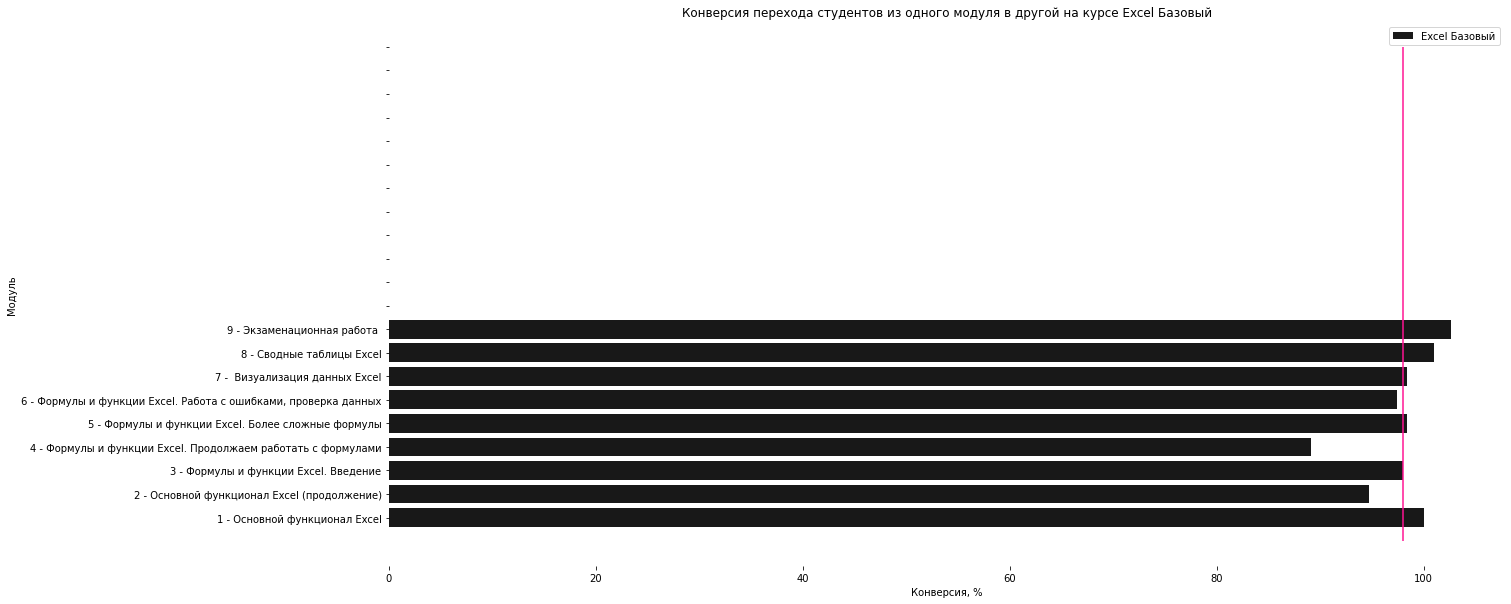

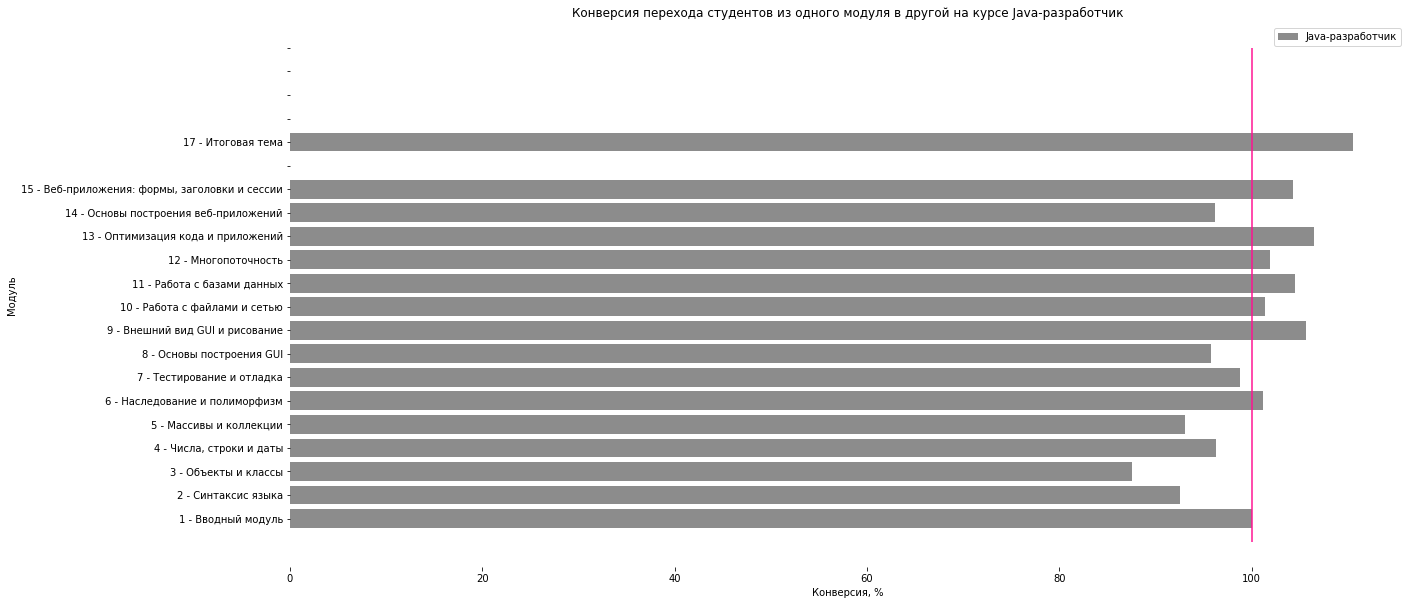

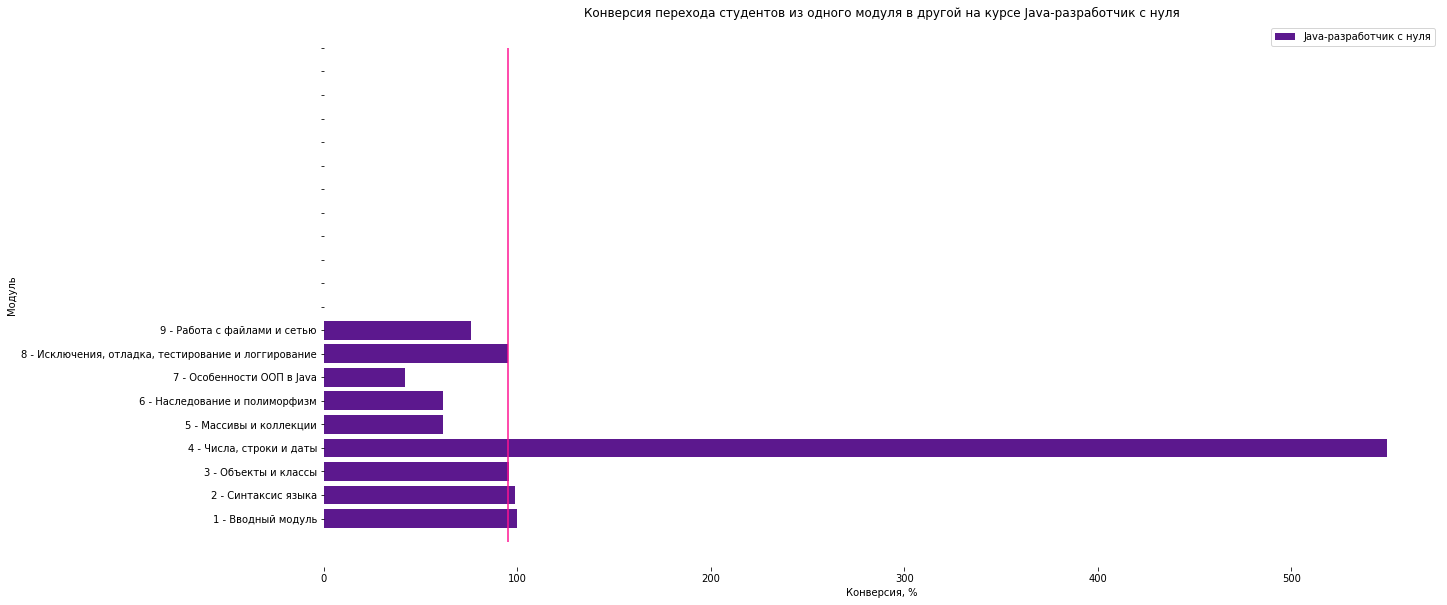

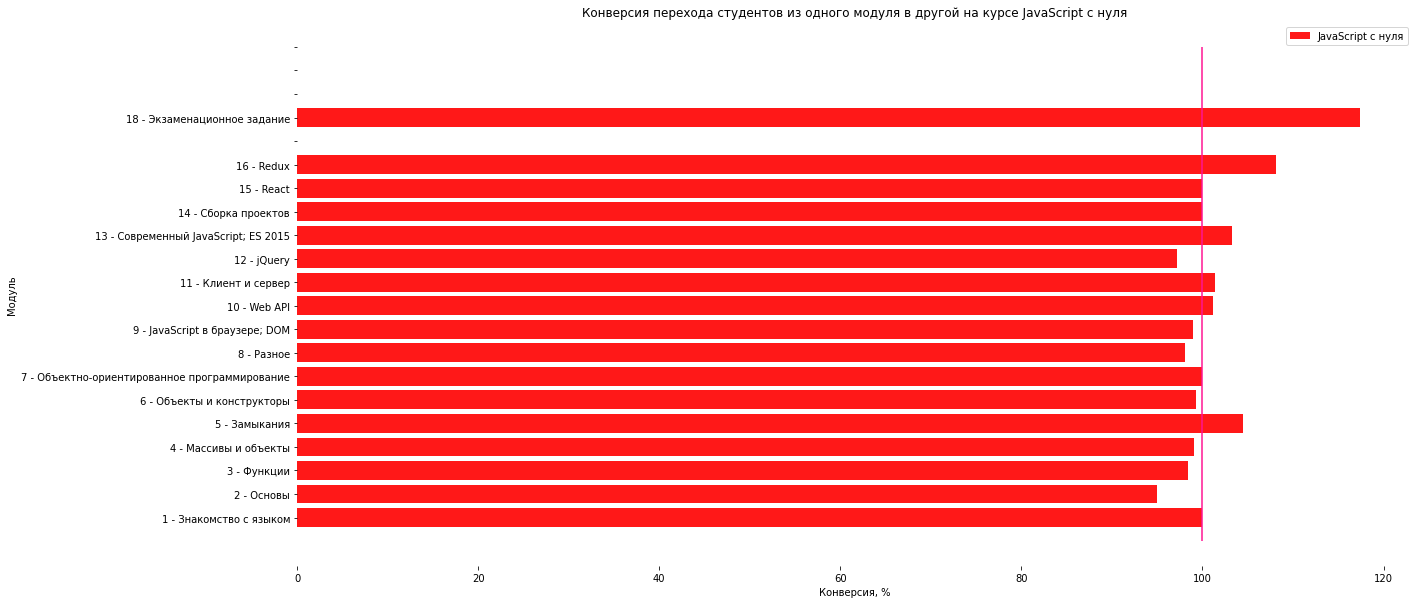

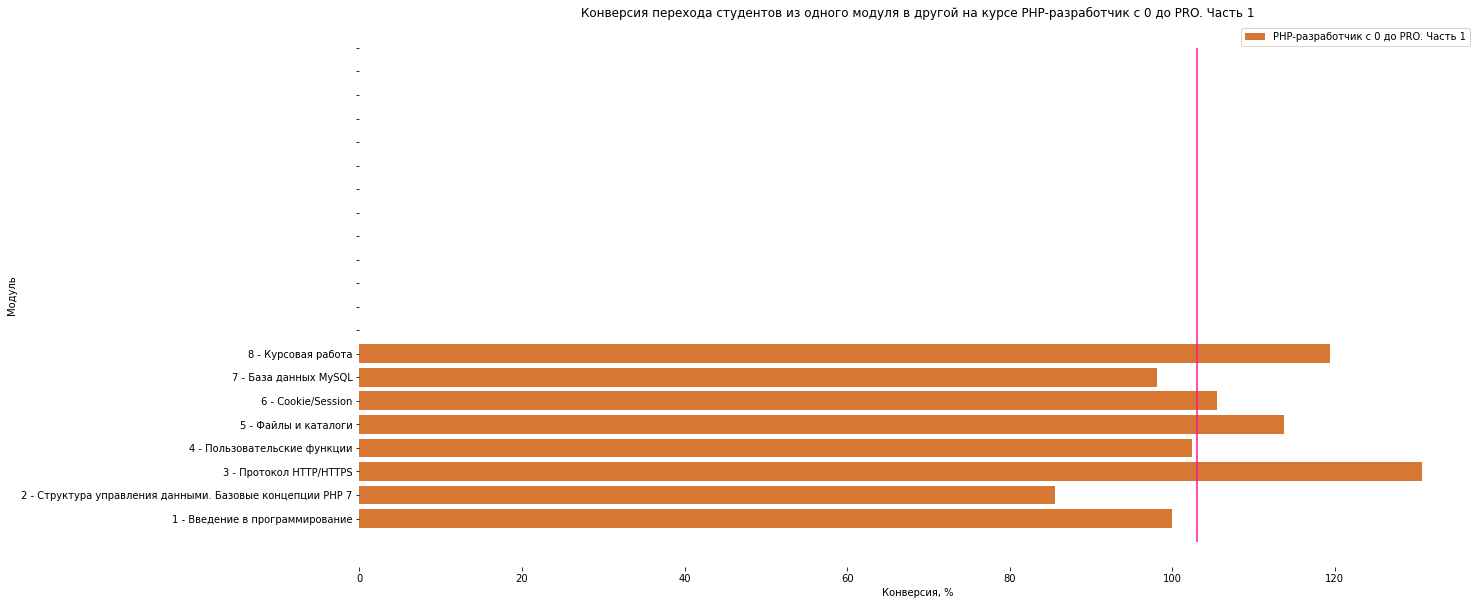

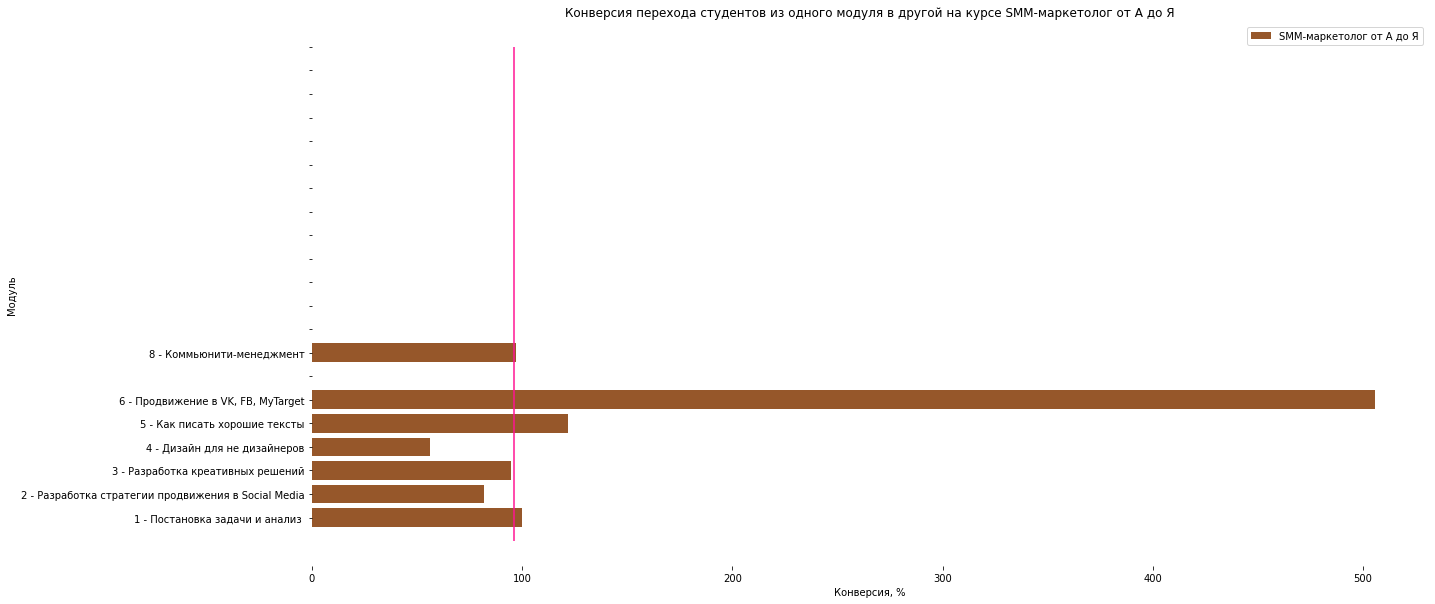

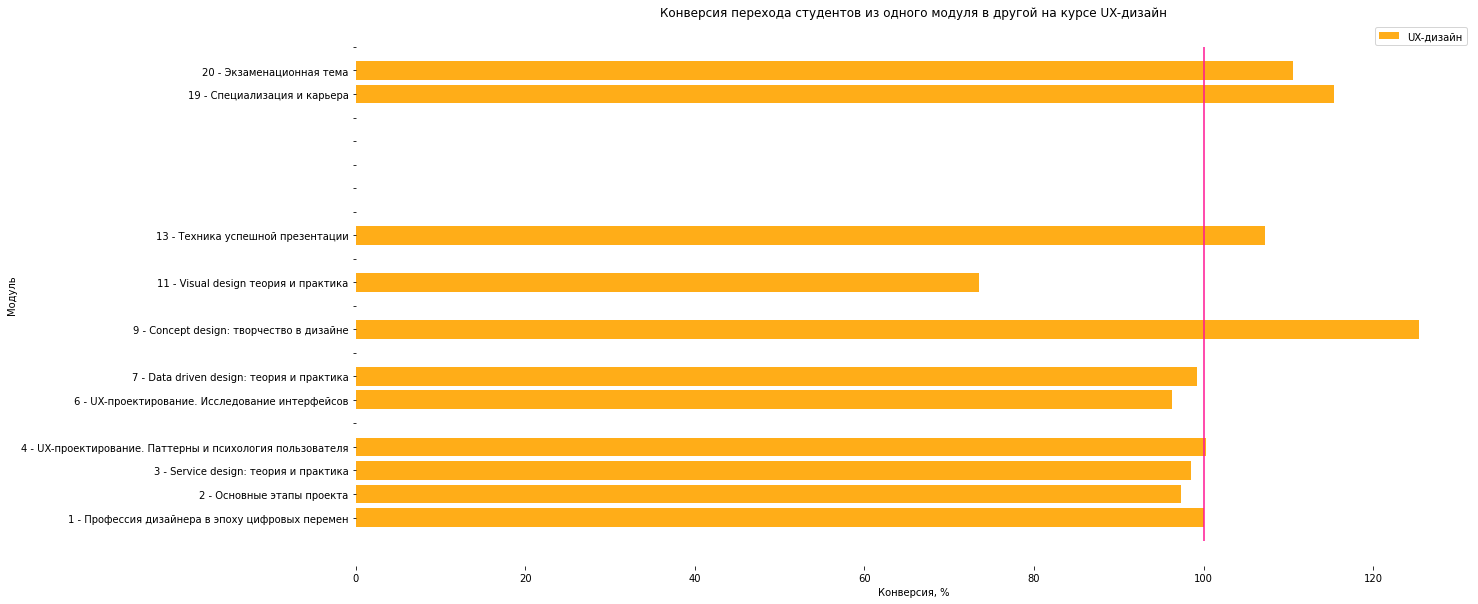

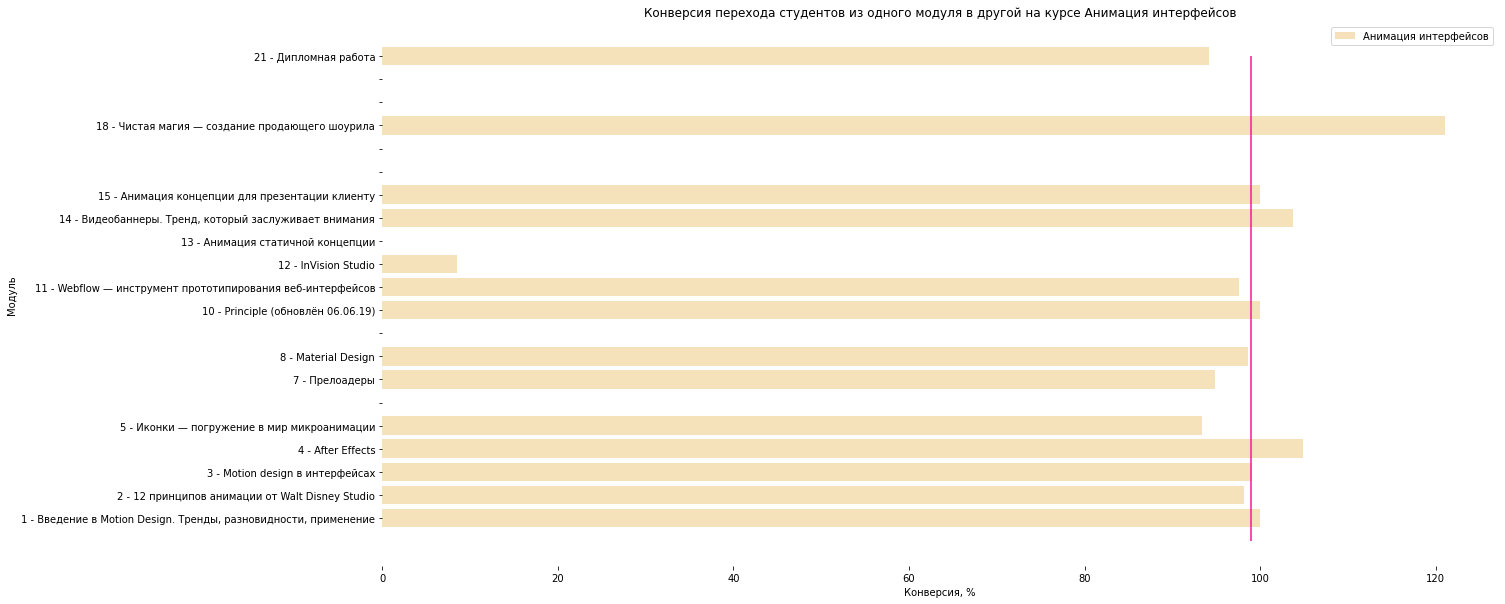

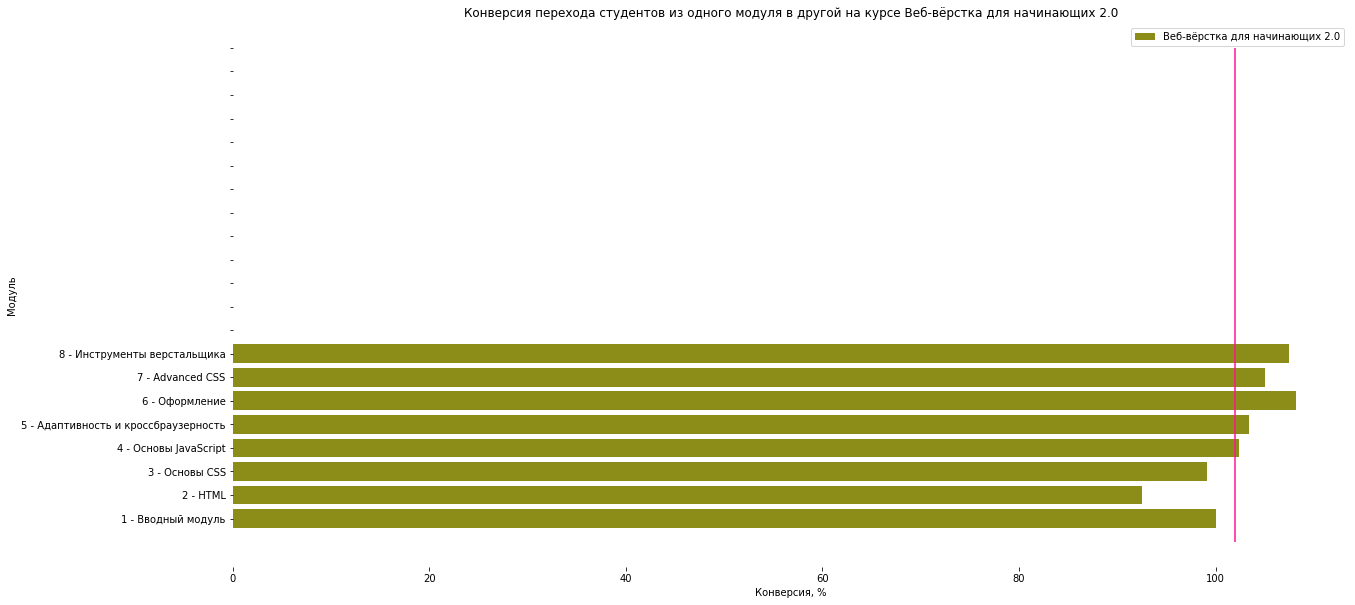

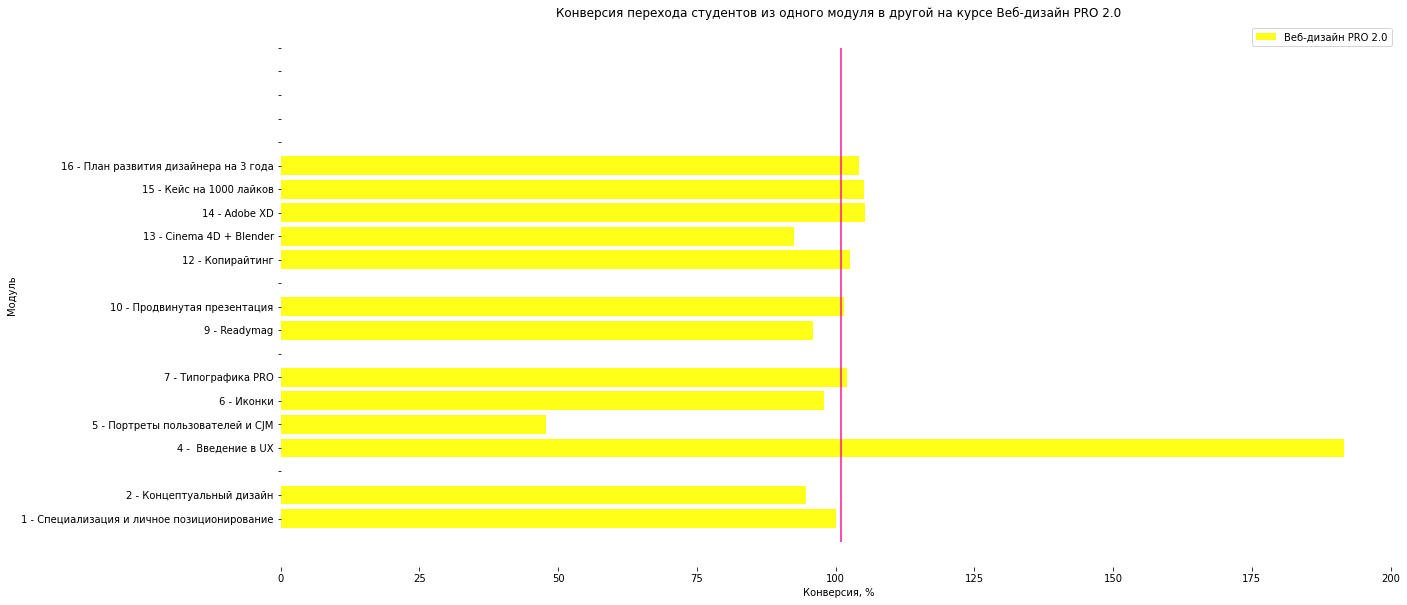

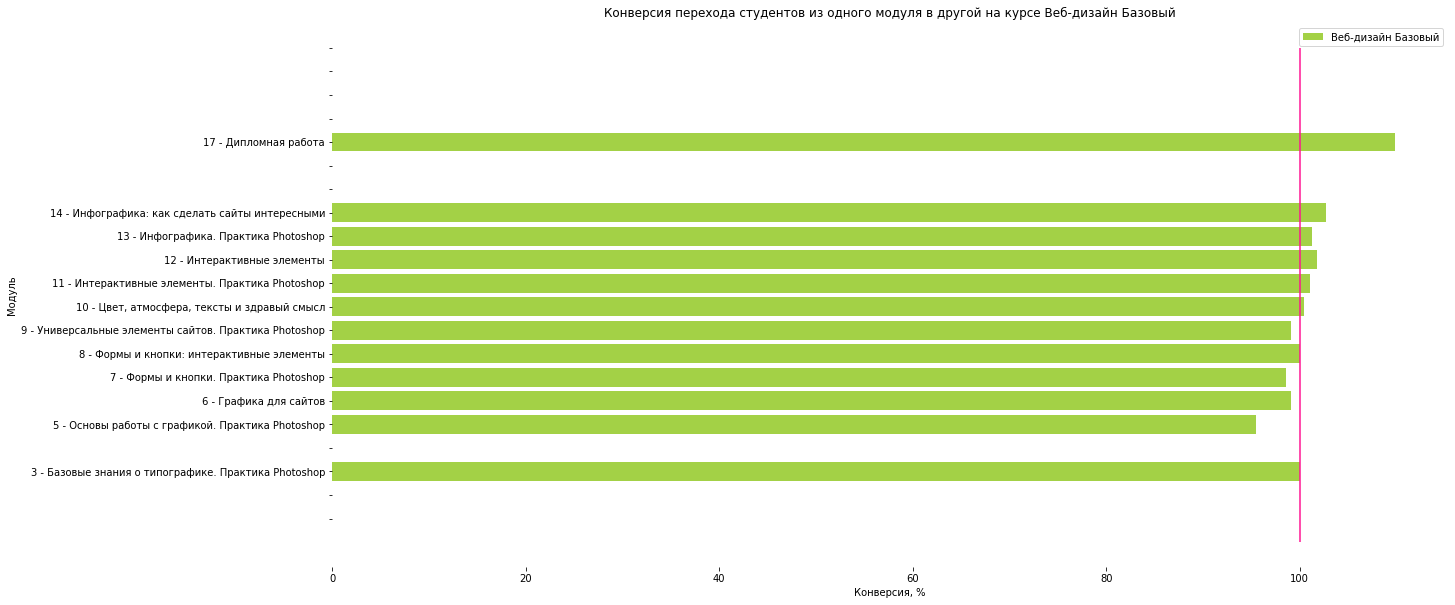

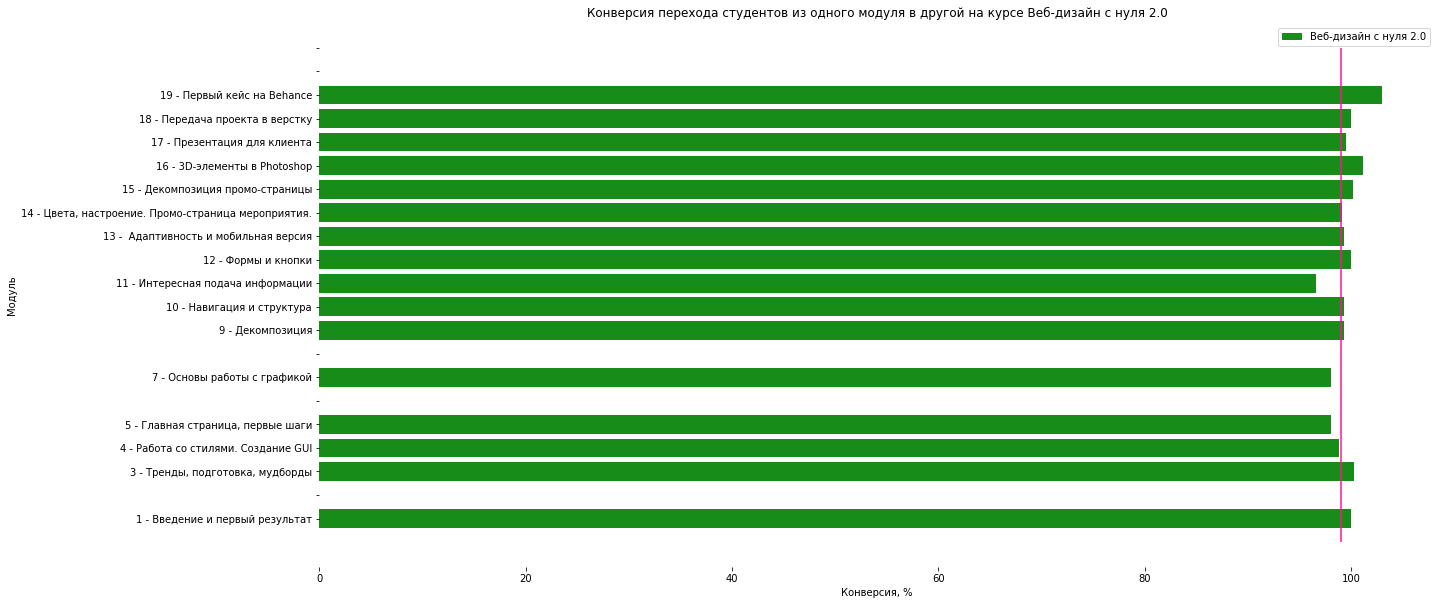

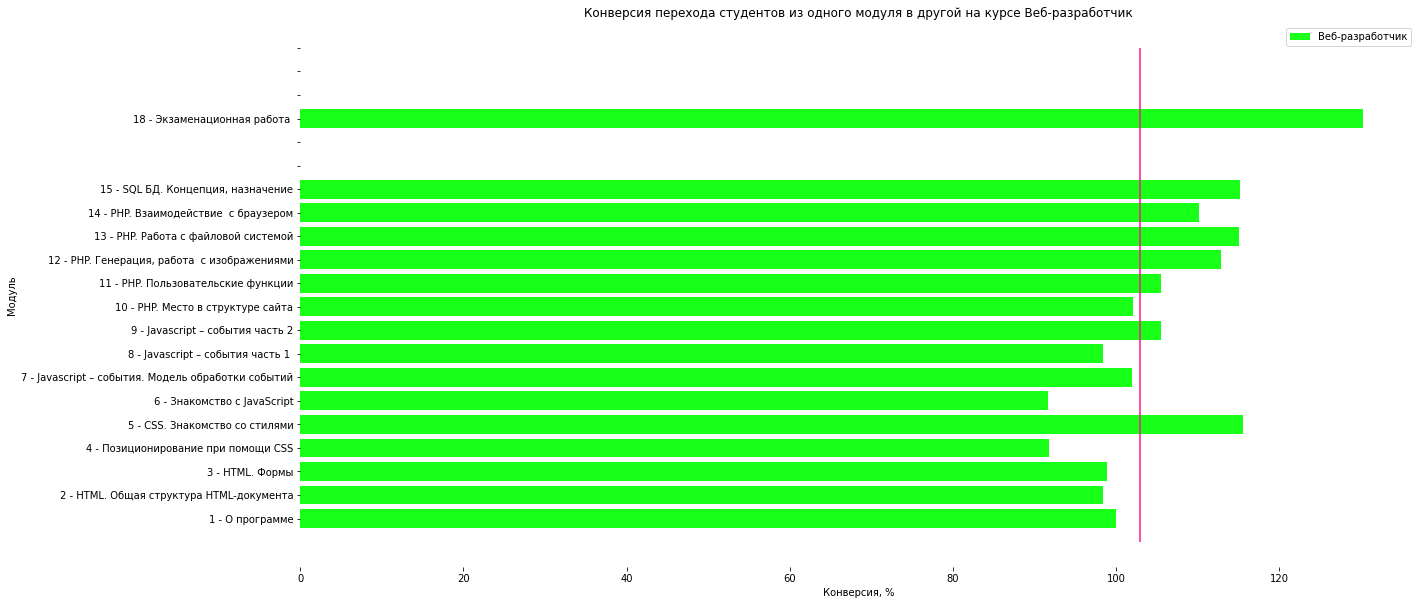

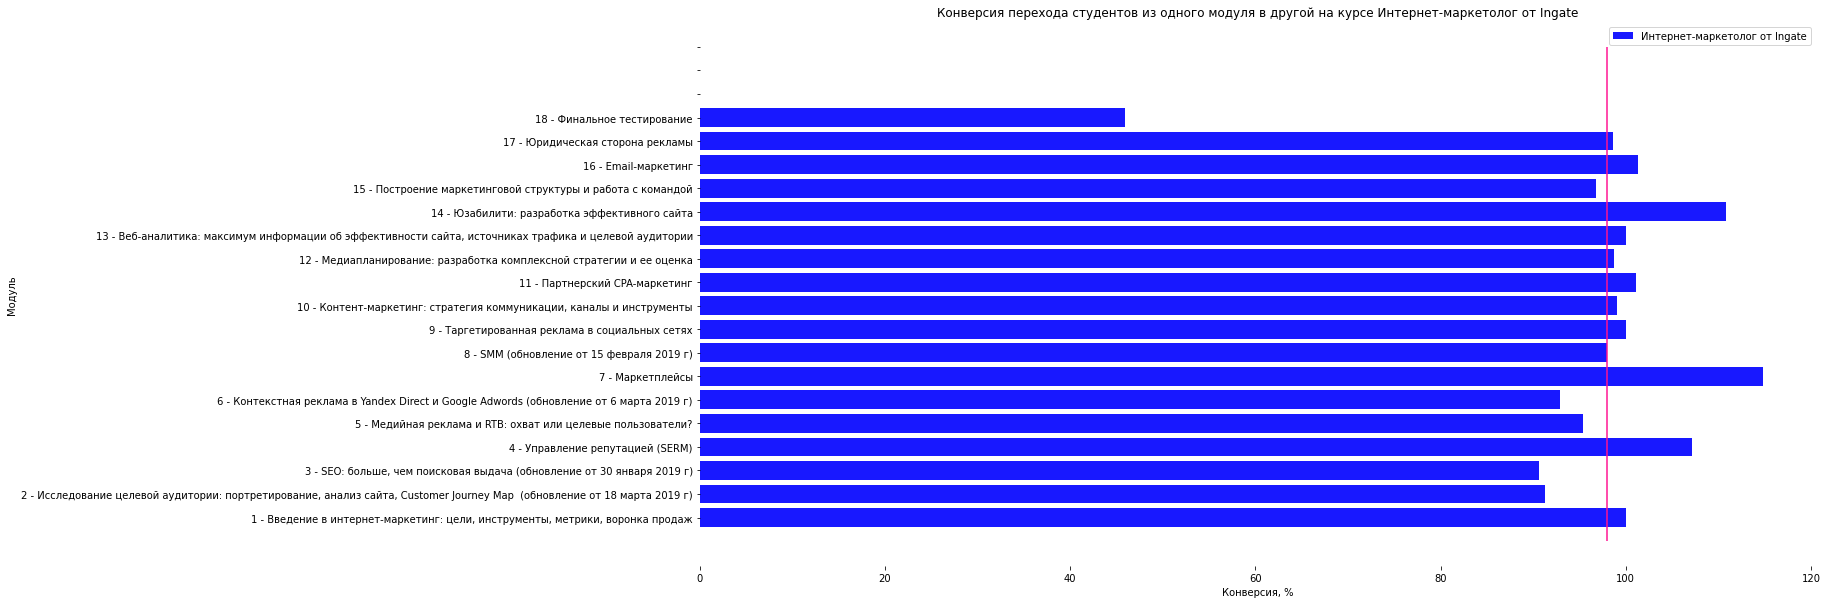

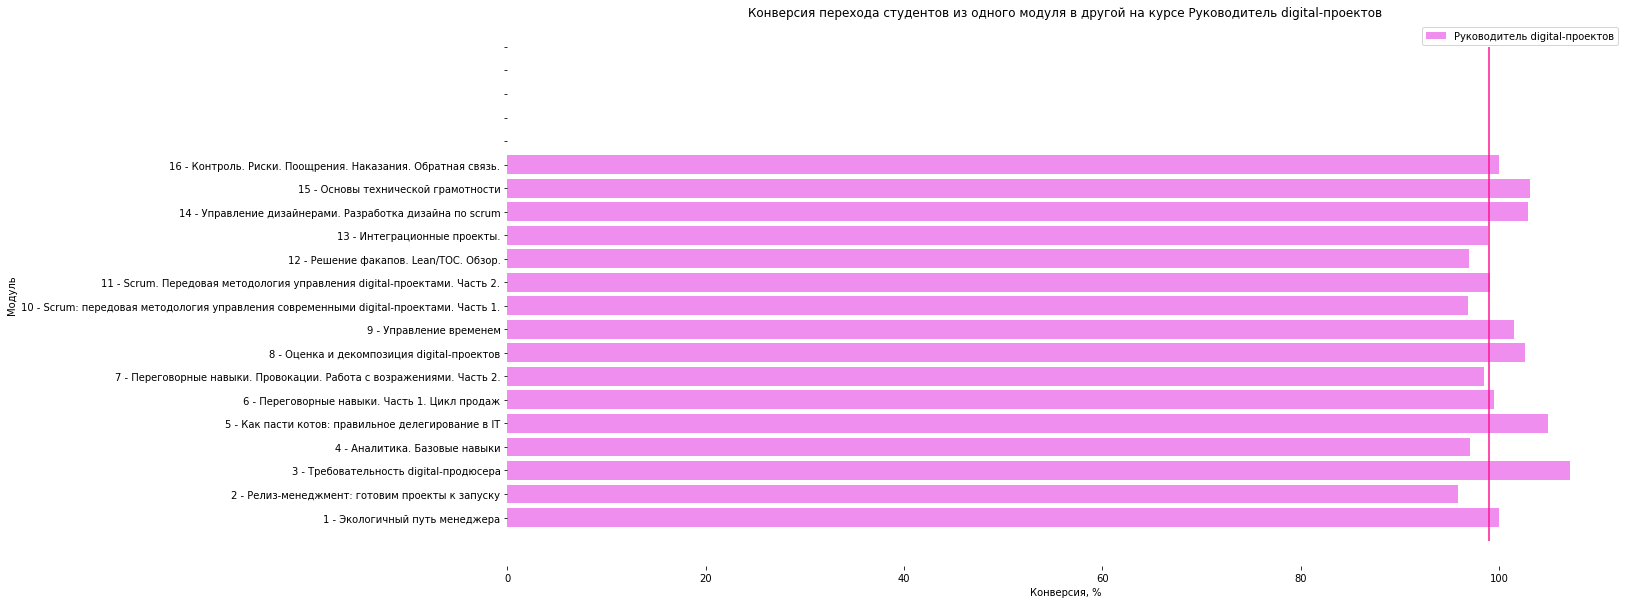

In [ ]:
# создадим списки с перечнем цветов и названий курсов
colors = ['black', 'gray', 'indigo', 'red', 'chocolate', 'saddlebrown', 'orange', 'wheat', 'olive', 'yellow', 'yellowgreen', 'green', 'lime', 'blue', 'violet']
label=list(p_table.columns)

# циклом пройдём по всем курсам и построим диаграммы
for i, course in enumerate(p_table.columns):
  plt.figure(figsize=(20,10))
  plt.barh(y=p_table.index, width=p_table[course].values, alpha=0.9, label=label[i], color=colors[i]) # присвоим значения осям barh. Цвет и наименование курса для легенды берутся из списков выше
  plt.box(False) # удалим рамку
  plt.vlines(int(p_table[course].median()), 0, len(p_table.index), color = 'deeppink') # добавим медиану
  plt.title('Конверсия перехода студентов из одного модуля в другой на курсе ' + course)
  plt.yticks(p_table.index, labels=p_table_1[course]) # присвоим значения и их отображение на оси y
  plt.ylabel('Модуль')
  plt.xlabel('Конверсия, %')
  plt.legend(loc='upper right') # расположим легенду справа наверху
  plt.show();

**4.4. Выводы по четвёртому разделу**<br><br>
Наибольшая конверсия наблюдается у 4 модуля "Числа, строки и даты" курса "Java-разработчик с нуля" и у 6 модуля "Продвижение в VK, FB, MyTarget" курса "SMM-маркетолог от А до Я". Посмотрев на медианное время прохождения предыдущих модулей, можно увидеть, что студенты выполняли их очень быстро. Возможно многие пропустили предыдущие модули, так как они оказались чересчур простыми.